
####<center>Luiza Castelar Rodrigues Pereira<br> Pós Graduação Big Data - Projeto Integrado de Dados </center>



#### **Importando bibliotecas e datasets**

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import re
from wordcloud import WordCloud
import seaborn as sb

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_extraction import DictVectorizer

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from numpy.linalg import eig

from numpy.core.defchararray import find

Importando os dados:

In [ ]:
listagemAirbnbs ='https://docs.google.com/spreadsheets/d/1NdX1A9VoBHR5LuBhrm1GfCOQirWumcaT_AmBdEHXyhU/export'

hospedagens = pd.read_excel(listagemAirbnbs)

In [ ]:
listagemBairros ='https://docs.google.com/spreadsheets/d/1TmuUAvHdjxVeIH5dbmEthckxogjFOS7rzUL1A3crw9s/export'

bairros = pd.read_excel(listagemBairros, names=['grupoBairro', 'nomeBairro'])

In [ ]:
listagemNomes ='https://docs.google.com/spreadsheets/d/1BuYoFiyIOGcJnHktXiwmVpHEw-3XBmKN/export'

nomesPessoas = pd.read_excel(listagemNomes)

#### **Analisando o dataset BAIRROS**

O **Dataset de bairros** possui 160 registros, com 2 colunas. Dessas colunas, a coluna "grupoBairro" se encontra com todos os valores NaN, enquanto a coluna "nomeBairro" se encontra com 160 valores únicos.

In [ ]:
bairros.head(5)

,grupoBairro,nomeBairro
0,NaN,Abolição
1,NaN,Acari
2,NaN,Água Santa
3,NaN,Alto da Boa Vista
4,NaN,Anchieta


In [ ]:
bairros['grupoBairro'].unique()

array([nan])

Verificando se tem nomes duplicados:

In [ ]:
bairros['nomeBairro'].duplicated().sum()

0

In [ ]:
bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grupoBairro  0 non-null      float64
 1   nomeBairro   160 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


Devido à coluna "grupoBairro" não ter dados relevantes, irei excluir essa coluna e manter apenas a coluna "nomeBairro".

In [ ]:
bairros = bairros['nomeBairro']
bairros

0               Abolição
1                  Acari
2             Água Santa
3      Alto da Boa Vista
4               Anchieta
             ...        
155          Vila Kosmos
156         Vila Militar
157       Vila Valqueire
158         Vista Alegre
159                Zumbi
Name: nomeBairro, Length: 160, dtype: object

A coluna bairro contém uma padronização de nomes que irei utilizar para corrigir os nomes das colunas das hospedagens aonde aparecem a localidades delas.

#### **Analisando o dataset HOSPEDAGENS**
O dataset **Hospedagens** possui 24881 entradas com 74 colunas, com algumas colunas totalmente vazias (os valores estão como NaN), outras com alguns missing values ou com tipo de dados incorreto:

In [ ]:
hospedagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            24881 non-null  float64       
 1   listing_url                                   24881 non-null  object        
 2   scrape_id                                     24881 non-null  float64       
 3   last_scraped                                  24881 non-null  datetime64[ns]
 4   name                                          24860 non-null  object        
 5   description                                   23975 non-null  object        
 6   neighborhood_overview                         13370 non-null  object        
 7   picture_url                                   24881 non-null  object        
 8   host_id                                       24881 non-null  floa

In [ ]:
hospedagens.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,404811.0,https://www.airbnb.com/rooms/404811,2.022062e+13,2022-06-21,BAND NEW APT COPACABANA,<b>The space</b><br />APT JUST RENOVATED! ALL ...,NaN,https://a0.muscache.com/pictures/4564530/8d1f8...,581488.0,https://www.airbnb.com/users/show/581488,...,NaN,NaN,NaN,NaN,f,1.0,0.0,1.0,0.0,NaN
1,2050265.0,https://www.airbnb.com/rooms/2050265,2.022062e+13,2022-06-21,LUJOSO..LINDO APARTAMENTO EN LEBLON,"Este apartamento é de tres quartos, dois banhe...",NaN,https://a0.muscache.com/pictures/28064774/ba84...,5811581.0,https://www.airbnb.com/users/show/5811581,...,NaN,NaN,NaN,NaN,f,1.0,1.0,0.0,0.0,NaN
2,3418918.0,https://www.airbnb.com/rooms/3418918,2.022062e+13,2022-06-21,Little apartment in Copacabana - Rio de Janeiro,A 30 mt2 apartment close to the Copacabana Pal...,NaN,https://a0.muscache.com/pictures/eed4877b-9fa5...,13530621.0,https://www.airbnb.com/users/show/13530621,...,NaN,NaN,NaN,NaN,f,1.0,1.0,0.0,0.0,NaN
3,22428582.0,https://www.airbnb.com/rooms/22428582,2.022062e+13,2022-06-21,Atlanthys Duplex,"Apartamento Duplex com duas suítes, TV 50´, Ne...",NaN,https://a0.muscache.com/pictures/dd6ef7fd-44e8...,164258385.0,https://www.airbnb.com/users/show/164258385,...,1.0,1.0,1.0,NaN,f,1.0,1.0,0.0,0.0,0.03
4,21319170.0,https://www.airbnb.com/rooms/21319170,2.022062e+13,2022-06-21,Amazing Mansion Rio De Janeiro,Amazing Mansion in Rio De Janeiro,NaN,https://a0.muscache.com/pictures/9e7e9201-6c46...,606990.0,https://www.airbnb.com/users/show/606990,...,NaN,NaN,NaN,NaN,f,1.0,1.0,0.0,0.0,NaN


####**Analisando e removendo colunas que não irei utilizar**

Verificando quantos valores null tem nas colunas e somando o número de nulls encontrados. Também verifico se tem valores únicos diferentes de null em alguma coluna.

In [ ]:
hospedagens['neighbourhood_group_cleansed'].isnull().sum()

24881

In [ ]:
hospedagens['bathrooms'].unique()

array([nan])

In [ ]:
hospedagens['license'].unique()

array([nan])

In [ ]:
hospedagens['calendar_updated'].isnull().sum()

24881

Todos os IDs do scrape são iguais.

In [ ]:
hospedagens['scrape_id'].duplicated(keep = False).sum()

24881

In [ ]:
hospedagens['last_scraped'].unique()

array(['2022-06-21T00:00:00.000000000', '2022-06-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

Analisando a coluna "host_thumbnail_url", vemos que os valores dela são iguais à coluna "host_picture_url", unica diferença é em relação ao parametro de tamanho da imagem:

In [ ]:
thumbnail = hospedagens.host_thumbnail_url.values.astype('str') #certificando que todos os valores sao string

#removendo o parametro de tamanho da foto

thumbnailSemParametro = []

for item in thumbnail:
  novoItem = item.split("?")[0]

  if novoItem == 'https://a0.muscache.com/defaults/user_pic-50x50.png':
    thumbnailSemParametro.append('https://a0.muscache.com/defaults/user_pic.png')
  else:
     thumbnailSemParametro.append(novoItem)

In [ ]:
hostPictures = hospedagens.host_picture_url.values.astype('str') #certificando que todos os valores sao string

hostPicturesSemParametro = []

for item in hostPictures:
  novoItem = item.split("?")[0]

  if novoItem == 'https://a0.muscache.com/defaults/user_pic-225x225.png':
    hostPicturesSemParametro.append('https://a0.muscache.com/defaults/user_pic.png')
  else:
     hostPicturesSemParametro.append(novoItem)

Se algum valor fosse diferente de 0, significa que temos valores de **host_thumbnail** diferentes de **host_pictures**. 
O **host_thumbnail** nada mais é do que a exata imagem do **host_pictures** em dimensão pequena, para ser usado em avatares de usuário por exemplo, que tem que ser naturalmente pequenos para não ocupar espaço na página e diminuir também a quantidade de megabytes de cada página.

In [ ]:
find(thumbnailSemParametro, hostPicturesSemParametro).sum() # se -1, não achou correspondência no find.

0

In [ ]:
hospedagens['calendar_last_scraped'].unique()

array(['2022-06-21T00:00:00.000000000', '2022-06-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

Cada id da hospedagem é único, porém não fornece informação relevante para o problema:

In [ ]:
hospedagens['id'].duplicated().sum()

0

Confirmando que todo registro tem o host_url.

In [ ]:
hospedagens['host_url'].isnull().sum()

0

Como a coluna host_listing_count e host_total_listing_count tem exatamente os mesmos valores para todos os registros, a host_listing_count será removida.

In [ ]:
(hospedagens['host_listings_count'] - hospedagens['host_total_listings_count']).sum()

0.0

Já a coluna "calculated_host_listing_count" apresenta valores diferentes da coluna host_listing_count, portanto ela será analisada e não removida.

In [ ]:
(hospedagens['host_total_listings_count'] - hospedagens['calculated_host_listings_count']).sum()

30198.0

Remoção de colunas que não tem nenhum valor ou significado para o trabalho:

In [ ]:
(hospedagens.drop(['neighbourhood_group_cleansed'], axis=1, inplace=True) if 'neighbourhood_group_cleansed' in hospedagens else '')

(hospedagens.drop(['bathrooms'], axis=1, inplace=True) if 'bathrooms' in hospedagens else '')

(hospedagens.drop(['license'], axis=1, inplace=True) if 'license' in hospedagens else '')

(hospedagens.drop(['calendar_updated'], axis=1, inplace=True) if 'calendar_updated' in hospedagens else '')

(hospedagens.drop(['scrape_id'], axis=1, inplace=True) if 'scrape_id' in hospedagens else '')

(hospedagens.drop(['last_scraped'], axis=1, inplace=True) if 'last_scraped' in hospedagens else '')

(hospedagens.drop(['host_thumbnail_url'], axis=1, inplace=True) if 'host_thumbnail_url' in hospedagens else '')

(hospedagens.drop(['host_picture_url'], axis=1, inplace=True) if 'host_picture_url' in hospedagens else '')

(hospedagens.drop(['calendar_last_scraped'], axis=1, inplace=True) if 'calendar_last_scraped' in hospedagens else '')

(hospedagens.drop(['host_total_listings_count'], axis=1, inplace=True) if 'host_total_listings_count' in hospedagens else '')

(hospedagens.drop(['id'], axis=1, inplace=True) if 'id' in hospedagens else '')

######Verificando quais colunas sobraram:

In [ ]:
hospedagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   24881 non-null  object        
 1   name                                          24860 non-null  object        
 2   description                                   23975 non-null  object        
 3   neighborhood_overview                         13370 non-null  object        
 4   picture_url                                   24881 non-null  object        
 5   host_id                                       24881 non-null  float64       
 6   host_url                                      24881 non-null  object        
 7   host_name                                     24764 non-null  object        
 8   host_since                                    24764 non-null  date

#### **FUNÇÕES GLOBAIS**

Transforma tudo em minusculo e remove acentos:

In [ ]:
def normalizaNome(variavel):
  variavel = variavel.str.lower() #tudo em minusculo

  variavel = variavel.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') #remove acentos
  
  return variavel

Gerar Gráfico WordCloud:

In [ ]:
def wordCloud(texto):
  wordcloud = WordCloud(background_color="white").generate(texto)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Constroi array para remover pontuação, preposições e tags:

In [ ]:
def removerCaracteresIndesejados():
  #com espaços entre cada preposicao
  preposicoes = [
      ' a ', ' e ', ' o ', ' da ', ' de ', ' do ', ' com ', ' para ', ' em ', ' as ', 
      ' os ', ' esse ', ' nesse ', ' nessa ', ' essa ', ' isto ', ' aquilo ', ' onde ', ' aonde ', ' aos ', ' pra ', ' pro '
  ]  

  pontuacao = ["/", ",", "-", "!", "?", ";", ".", "(",")", "&", ":", "'", "\\", "|" ] 

  tags = ['<br>','<br/>', '<br />','<b>','</b>']

  pontuacao = ["\\" + item for item in pontuacao] # \ escape (literal char)

  return {
      'tags':  "|".join(tags),
      'pontuacao':  "|".join(pontuacao),
      'preposicao': "|".join(preposicoes)
  }

Descobre quanto cada variavel descreve a variabilidade do dataset:

In [ ]:
def getVariabilidadePCA(dataset):
  media = np.mean(dataset.T, axis=1) # pega a média dos valores no eixo 1
  dataset_scaled = dataset - media # substrai todos os valores pela media

  S = np.cov(dataset_scaled.T) # matriz de covariancia

  eig_vals, eig_vecs = eig(S) # pegar EIGENVALUES e EIGENVECTORS

  #ordenar do maior para o menor valor
  sort_index = eig_vals.argsort()[::-1] 
  values_sorted = eig_vals[sort_index]
  vectors_sorted = eig_vecs[:, sort_index]

  explained_variance_ratio = values_sorted/values_sorted.sum()
  
  return(explained_variance_ratio)

#### **Missing values**

Descobri que 117 hospedagens estavam ligadas à 5 hosts que não possuiam data de entrada. Esses mesmo hosts são os que não tem o host_name (analisado mais acima), host_about, host_verifications e uma série de atributos que estão com NaN.

In [ ]:
nulos = hospedagens['host_since'].isnull()

print("Hosts sem data de inserção:", nulos.sum())

hospedagens[nulos].groupby(['host_id'], as_index=False)['host_id'].count()

Hosts sem data de inserção: 117


,host_id
0,1
1,112
2,1
3,1
4,2


Campos como minimum_nights_avg_ntm, que deveriam ser numericos, se encontram valores como datetime, em 111 registros pertencentes aos nulos calculados anteriormente:

In [ ]:
hospedagens[nulos].select_dtypes(include='object').describe()

,listing_url,name,description,neighborhood_overview,picture_url,host_url,host_name,host_location,host_about,host_response_time,...,has_availability,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
count,117,117,117,40,117,117,0,0,0,0,...,117,111,110,110,110,110,110,110,117,111
unique,117,117,116,14,117,5,0,0,0,0,...,1,51,49,45,45,40,32,49,2,92
top,https://www.airbnb.com/rooms/38746428,"Omar do Rio: Excellent Room & Room, Complete, ...",<b>Other things to note</b><br />Welcome to Om...,Copacabana is located in the South Zone of Rio...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/6000862,NaN,NaN,NaN,NaN,...,t,5.0,5.0,5.0,5.0,5.0,5.0,5.0,t,1.23
freq,1,1,2,15,1,112,NaN,NaN,NaN,NaN,...,117,11,17,17,24,29,35,12,113,3


In [ ]:
hospedagens[nulos]['host_url'].groupby(hospedagens[nulos]['host_url']).size()

host_url
https://www.airbnb.com/users/show/1016923       1
https://www.airbnb.com/users/show/44994758      1
https://www.airbnb.com/users/show/6000862     112
https://www.airbnb.com/users/show/81549860      1
https://www.airbnb.com/users/show/83284834      2
Name: host_url, dtype: int64

In [ ]:
hospedagens[nulos].loc[:, 'host_name':].head(5)

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
136,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.62,4.77,4.85,4.54,t,112.0,112.0,0.0,0.0,0.81
619,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,1.0,1.0,0.0,0.0,NaN
827,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.93,2022-09-04 00:00:00,5.0,4.76,t,112.0,112.0,0.0,0.0,1.47
1527,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.89,4.78,5.0,3.78,t,112.0,112.0,0.0,0.0,1.19
1534,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.67,4.83,5.0,2022-05-04 00:00:00,t,112.0,112.0,0.0,0.0,1.62


Removendo essas linhas do dataset:

In [ ]:
hospedagens.drop(hospedagens[nulos].index, axis=0, inplace = True)

Outra triagem de valores nulos:

In [ ]:
accommodatesZeradas = hospedagens[hospedagens['accommodates'] == 0]

print('Quantas hospedagens com accommodates zerado e outros atributos:', len(accommodatesZeradas))

accommodatesZeradas.loc[:, 'accommodates':'amenities' ]

Quantas hospedagens com accommodates zerado e outros atributos: 7


,accommodates,bathrooms_text,bedrooms,beds,amenities
4212,0.0,NaN,NaN,NaN,"[""Laundry services"", ""Complimentary breakfast""..."
11262,0.0,NaN,NaN,NaN,"[""Laundry services"", ""Onsite restaurant \u2014..."
13195,0.0,NaN,NaN,NaN,"[""Laundry services"", ""TV"", ""Onsite bar"", ""Conc..."
13681,0.0,NaN,NaN,NaN,"[""TV"", ""Hair dryer"", ""Onsite bar"", ""Carbon mon..."
16103,0.0,NaN,NaN,NaN,"[""Laundry services"", ""Carbon monoxide alarm"", ..."
17069,0.0,NaN,NaN,NaN,"[""Laundry services"", ""Carbon monoxide alarm"", ..."
21629,0.0,NaN,NaN,NaN,"[""Onsite bar"", ""Carbon monoxide alarm"", ""Cooki..."


In [ ]:
hospedagens.drop(accommodatesZeradas.index, axis=0, inplace = True)

In [ ]:
len(hospedagens)

24757

#### **Analisando colunas de texto livre/aberto**

Transformando as colunas no tipo real delas antes de utilizá-las:

In [ ]:
hospedagens['host_id']= hospedagens['host_id'].astype(int)

hospedagens['name'] = hospedagens['name'].astype("string")

hospedagens['description'] = hospedagens['description'].astype("string")

hospedagens['host_about'] = hospedagens['host_about'].astype("string")

hospedagens['neighborhood_overview'] = hospedagens['neighborhood_overview'].astype("string")

##### **Análise por nome de proprietário/host**

Verificando hospedagens sem nome de host:

In [ ]:
nomes = pd.notna(hospedagens['host_name'])

hospedagens[nomes]['host_name'].head(5)

0      Carlos
1     Viviana
2       Keyla
3      Carlos
4    Humberto
Name: host_name, dtype: object

In [ ]:
host_id =  hospedagens[hospedagens['host_name'].isnull()].groupby(['host_id']).size().reset_index(name='counts')

host_id['host_id'].count()

0

Calculando quantas mulheres e quantos homens estão oferecendo airbnb (POR APROXIMAÇÃO):

In [ ]:
#remove acentos e maisculas
nomeHosts = normalizaNome(hospedagens[nomes]['host_name'])
nomesMasculinos = normalizaNome(nomesPessoas['nomesMasculinos'])
nomesFemininos = normalizaNome(nomesPessoas['nomesFemininos'])

#quem são homens e quem são mulheres
homens = nomeHosts.isin(nomesMasculinos)
mulheres = nomeHosts.isin(nomesFemininos)

#modifica True para M ou F e acrescenta nova coluna
homens[homens == True] = 'M'
homens[mulheres == True] = 'F'

hostsComNome = hospedagens[nomes].copy()
hostsComNome['sexo'] = homens

#colunas inuteis para essa analise. Remover elas
hostsComNome.drop(hostsComNome.loc[:, 'host_since':'reviews_per_month'].columns, axis=1, inplace=True)
hostsComNome.drop(hostsComNome.loc[:, 'listing_url':'picture_url'].columns, axis=1, inplace=True)

#isolar registros que não sao nem mulher nem homem (ex: estadias ou que contem ambos os sexos no nome)
somenteDetectados = hostsComNome[hostsComNome['sexo'] != False]

# uma pessoa pode ter mais de um airbnb cadastrado (portanto agrupar para não repetir)
agruparPorID = somenteDetectados.groupby(by=['host_id', 'host_name', 'sexo'], as_index = False)['host_id'].count()

agruparPorSexo = agruparPorID.groupby(by=['sexo'])['sexo'].count()
agruparPorSexo

sexo
F    7661
M    5765
Name: sexo, dtype: int64

In [ ]:
#remoção de casais
dicionarioNomeConjunto = '|'.join([' e ', '\&', ' y ', ' and ', '\+'])

dicionarioNomeConjunto 

' e |\\&| y | and |\\+'

In [ ]:
pd.set_option('display.max_rows', None)

# nomes de pousadas/hoteis, casais e nomes que podem ser ao mesmo tempo feminino/masculino
nomesSemSexo = hostsComNome[hostsComNome['sexo'] == False]

nomesSemSexoNormalizados = normalizaNome(nomesSemSexo['host_name']) 

#separando nome de casais
casais = set(filter(lambda item: re.search(dicionarioNomeConjunto, item), nomesSemSexoNormalizados))

numCasais = len(casais)

print(numCasais, "são casais")

nomesSemSexo = nomesSemSexo[~nomesSemSexoNormalizados.isin(casais)]

217 são casais


In [ ]:
casais

{'adalberto e roberta',
 'adeildo & sheila',
 'adelia&davi and oggie',
 'adriana e eduardo',
 'adriana e luiz',
 'adriane e rogerio',
 'alan & catherine',
 'alastair & sheila',
 'alastair and nilda',
 'alessandra  e rafael',
 'alessandro & elaine',
 'alexandre & fernanda',
 'alexandre e andressa',
 'alexrioflats - alex & danielle',
 'aline e viviane',
 'amin e julia',
 'andre & fabiana',
 'andrea & alexandre',
 'andres & manu',
 'ane & sergio',
 'angela & mario sergio',
 'angelica and bob',
 "anton e we'e'ena",
 'antonio e adriana',
 'arno & igor',
 'aurea & humberto',
 'ava e gustavo',
 'barbara & isabel',
 'barbara & jb',
 'barbara & vitor',
 'belchior e manoela',
 'botafogo & copanema',
 'brazilupscale - vanessa e fabio',
 'brito neto e adriana',
 'bruna e nathalia',
 'bruno & marcos',
 'bruno e jois',
 'bruno+jessica',
 'caldeira e bia',
 'camila e gabi',
 'carla e carlos',
 'carlos & melissa',
 'carlos antonio e leila',
 'carlos paiva & genadia',
 'carol e marcio',
 'cassio e natt

In [ ]:
agruparPorSexo['C'] = numCasais
agruparPorSexo

sexo
F    7661
M    5765
C     217
Name: sexo, dtype: int64

In [ ]:
nomesSemSexo['host_name'].unique().tolist()

['AryAdne',
 'Song Wha',
 'Kelen',
 'Pedro Minc',
 'Adriane',
 'Mannette',
 'Carolina Lis',
 'Gilles',
 'Linkhouse',
 'Estadia',
 "Sam'S Home",
 'Gricel',
 'Sonali',
 'Gessé',
 'Alves',
 'Yes Temporada',
 'Flat Residence',
 'Apart-Hotel Convention Rio Stay',
 '一麟',
 'Tupiniquim Hostel',
 'Jacque',
 'Goya',
 'Jaqueline U. Thorsten',
 'Pineapples',
 'Edégli',
 'LuxoBrasil',
 'Anfitrião Prime',
 'Casa Do Mar',
 'Blue Rentals',
 'Harley',
 'Cris',
 'Alcilene',
 'Joney',
 'Equipe Do Villa',
 'Silvio  Cesar',
 'Francisco Javier',
 'Soeli',
 'Regina Célia Brito Soares',
 'Walker',
 'Igor Passos',
 'Waldemar',
 'Dani',
 'Rioparadis',
 'Bet',
 'Hálen',
 'Ibis Rio De Janeiro Centro',
 'WhereInRio',
 'Boris',
 'Suyanne',
 'Cristiane',
 'Amenik',
 'Wallace Áraujo Da Silva',
 'N.',
 'Royalty Barra',
 'Damaris',
 'Mi Casa Su Casa',
 'Naeory Ysabelle',
 'Maria Da Luz',
 'Guilherme Henrique',
 'Rio Stay Residence',
 'Evilene',
 'João Victor',
 'Mm Aluguel Por Temporada',
 'Babi',
 'Moacir',
 'Rose Kan

Representando graficamente os gêneros:

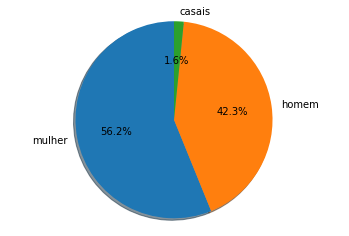

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(agruparPorSexo, labels=['mulher', 'homem', 'casais'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### **Análise por nome de propriedade**

Verificando as hospedagens sem nome:

In [ ]:
hospedagens['name'].isnull().sum()

21

Limpando a coluna "name" para análise (removendo pontuação, preposições e espaços antes e depois das sentenças):

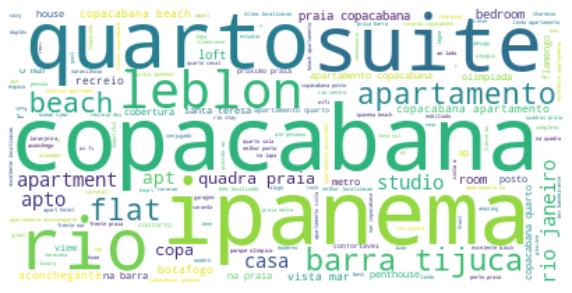

In [ ]:
nomeHospedagem = hospedagens['name'].dropna()  #remove nulos

nomeHospedagem = normalizaNome(nomeHospedagem) # minusculo e sem acento

semPontuacao = [re.sub(removerCaracteresIndesejados()['pontuacao'], ' ', item) for item in nomeHospedagem]

semPreposicoes = [ (re.sub(removerCaracteresIndesejados()['preposicao'], ' ', item))  for item in semPontuacao]

wordCloud(' '.join(semPreposicoes))

##### **Análise por descrição da propriedade**

In [ ]:
print("Hospedagens sem descrição: ", hospedagens['description'].isnull().sum())

descricoes = hospedagens['description'].dropna()

descricoes = normalizaNome(descricoes)

semTags = [ (re.sub(removerCaracteresIndesejados()['tags'], ' ', item))  for item in descricoes]

semPontuacao = [re.sub(removerCaracteresIndesejados()['pontuacao'], ' ', item) for item in semTags]

semPreposicoes = [ (re.sub(removerCaracteresIndesejados()['preposicao'], ' ', item))  for item in semPontuacao]

sentencaUnica = ' '.join(semPreposicoes)

wordCloud(sentencaUnica)

Hospedagens sem descrição:  899


Verificação de quantas vezes as palavras que mais se destacam aparecem na coluna description:

In [ ]:
descricao =  hospedagens['description'].dropna()

print('Total palavras na coluna description:', descricao.str.split().str.len().sum())

print('\nQuantas vezes a palavra SPACE aparece na coluna description:', len(sentencaUnica.split('space')))

print('\nQuantas vezes a palavra GUEST aparece na coluna description:', len(sentencaUnica.split('guest')))

print('\nQuantas vezes a palavra AR CONDICIONADO aparece na coluna description:', len(sentencaUnica.split('ar condicionado')))

##### **Análise pelas caracteristicas que o host pôs no seu perfil, sobre si mesmo**

In [ ]:
print("Host que deixaram de colocar sua descrição: ", hospedagens['host_about'].isnull().sum())

sobreHost = hospedagens['host_about'].dropna()

sobreHost = normalizaNome(sobreHost)

semTags = [ (re.sub(removerCaracteresIndesejados()['tags'], ' ', item))  for item in sobreHost]

semPontuacao = [re.sub(removerCaracteresIndesejados()['pontuacao'], ' ', item) for item in semTags]

semPreposicoes = [ (re.sub(removerCaracteresIndesejados()['preposicao'], ' ', item))  for item in semPontuacao]

sentencaUnica = ' '.join(semPreposicoes)

wordCloud(sentencaUnica)

##### **Análise por vizinhança**

In [ ]:
print("Host que não colocaram a descrição da vizinhança: ", hospedagens['neighborhood_overview'].isnull().sum())

vizinhanca = hospedagens['neighborhood_overview'].dropna()

vizinhanca = normalizaNome(vizinhanca)

semTags = [ (re.sub(removerCaracteresIndesejados()['tags'], ' ', item))  for item in vizinhanca]

semPontuacao = [re.sub(removerCaracteresIndesejados()['pontuacao'], ' ', item) for item in semTags]

semPreposicoes = [ (re.sub(removerCaracteresIndesejados()['preposicao'], ' ', item))  for item in semPontuacao]

sentencaUnica = ' '.join(semPreposicoes)

wordCloud(sentencaUnica)

#### **Transformando valores**
Analisando os principais elementos da hospedagem (quartos, banheiros, nº de pessoas que cabem, qual tipo de hospedagem, etc).


#####**Banheiros**

Banheiros erroneamente classificados pelos hosts como "0 banheiros compartilhados": 

In [ ]:
zeroBanheiros = hospedagens[hospedagens['bathrooms_text'] == '0 shared baths']
zeroBanheiros.head(3)

,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
647,https://www.airbnb.com/rooms/10123138,Single Bed in 5 Bunk Bed Dorm Room-Riocentro,"Combinação de estilo, conveniência, economia e...","Combinação de estilo, conveniência, economia e...",https://a0.muscache.com/pictures/2ef9d35b-cd7c...,26748682,https://www.airbnb.com/users/show/26748682,Rose Kaneko,2015-01-26,"Rio de Janeiro, State of Rio de Janeiro, Brazil","We are a happy family, who like to have guests...",within an hour,1.0,0.86,t,NaN,15.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Curicica,-2294864.0,-4338305.0,Shared room in rental unit,Shared room,5.0,0 shared baths,1.0,5.0,"[""Stove"", ""Backyard"", ""Breakfast"", ""Microwave""...",$120.00,1.0,30.0,1.0,5.0,30.0,30.0,2022-06-03 00:00:00,30.0,t,30.0,60.0,90.0,354.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,16.0,1.0,11.0,4.0,NaN
2065,https://www.airbnb.com/rooms/46880547,NAO ESTA MAIS DISPONÍVEL,<NA>,<NA>,https://a0.muscache.com/pictures/12fe7731-f8da...,100920784,https://www.airbnb.com/users/show/100920784,Leandro,2016-10-23,"Petrópolis, State of Rio Grande do Sul, Brazil",<NA>,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone']",t,t,NaN,Centro,-2290975.0,-4319437.0,Shared room in rental unit,Shared room,1.0,0 shared baths,1.0,1.0,"[""Security cameras on property"", ""Long term st...",$510.00,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,t,27.0,57.0,87.0,87.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,0.0,0.0,1.0,NaN
4605,https://www.airbnb.com/rooms/13233310,Special Studios as charming suítes,"Heart of Copacabana, between the Beach and La...",<NA>,https://a0.muscache.com/pictures/258cec18-85cf...,74302659,https://www.airbnb.com/users/show/74302659,Ralpho,2016-05-27,"Rio de Janeiro, State of Rio de Janeiro, Brazil",Engineer from São Paulo living in Rio,NaN,NaN,NaN,f,NaN,3.0,"['email', 'phone']",t,f,NaN,Copacabana,-2297323.0,-4319239.0,Private room in guest suite,Private room,1.0,0 shared baths,NaN,1.0,"[""Building staff"", ""Long term stays allowed""]","$5,430.00",3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,28.0,58.0,88.0,363.0,1.0,0.0,0.0,2018-01-04,2018-01-04,5.0,4.0,5.0,5.0,5.0,5.0,5.0,f,1.0,0.0,1.0,0.0,0.02


In [ ]:
hospedagens['bathrooms_text'].describe()

count      24711
unique        48
top       1 bath
freq       10431
Name: bathrooms_text, dtype: object

Tratando a coluna bathroom_text e criando a coluna bathroom_type

In [ ]:
baths = "|".join(['baths', 'bath'])

halfBath = '|'.join(['Half-bath', 'half-bath', 'Half-', 'half-'])

print('Quantos nulos:', hospedagens['bathrooms_text'].isnull().sum())

#print("Valores únicos:",  hospedagens['bathrooms_text'].unique())

hospedagens['bathrooms_text'].fillna('1', inplace = True)

hospedagens['bathrooms'] = ((hospedagens['bathrooms_text'].str.replace(baths, '', regex=True)).replace(halfBath, '1', regex=True)).str.lower()

shared = 0
private = 0

for item in hospedagens['bathrooms']:
  if 'shared' in item: 
    shared = shared + 1
  elif 'private' in item:
    private= private + 1

print('Número de banheiros privados:', private, '; Número de banheiros compartilhados:', shared)

hospedagens['bathrooms_type'] = hospedagens['bathrooms'].str.replace('[0-9]*(.|)[0-9]+', '', regex=True)

hospedagens['bathrooms'] = hospedagens['bathrooms'].str.replace('shared|Shared|private|Private', '', regex=True)

hospedagens['bathrooms'] = hospedagens['bathrooms'].astype("float")

Quantos nulos: 46
Número de banheiros privados: 1472 ; Número de banheiros compartilhados: 2914


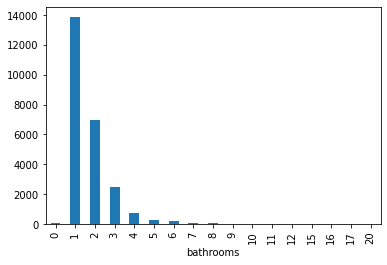

In [ ]:
hospedagens['bathrooms'] = hospedagens['bathrooms'].apply(np.ceil)

hospedagens['bathrooms'] = hospedagens['bathrooms'].astype("int")

banheiros = hospedagens['bathrooms'].groupby(hospedagens['bathrooms']).count()

banheiros.plot.bar()

plt.show()

In [ ]:
hospedagens['bathrooms_type'] = hospedagens['bathrooms_type'].apply(lambda x: x.strip())

tipoBanheiro = hospedagens[hospedagens['bathrooms_type'] !='']

tipoBanheiro.groupby(['bathrooms', 'bathrooms_type'], as_index=False).size()

,bathrooms,bathrooms_type,size
0,0,shared,29
1,1,private,1472
2,1,shared,1905
3,2,shared,769
4,3,shared,144
5,4,shared,35
6,5,shared,17
7,6,shared,6
8,7,shared,7
9,9,shared,1


Verificar a nova coluna bathrooms_type quanto ao fato de ser ou não nula:

In [ ]:
hospedagens['bathrooms_type'].replace('', np.nan, inplace=True)

print ('Banheiros sem definição:', hospedagens['bathrooms_type'].isnull().sum(), 'do total:', len(hospedagens['bathrooms_type']))

Banheiros sem definição: 20371 do total: 24757


In [ ]:
tipoBanheiro.groupby(['bathrooms_type']).size()

bathrooms_type
private    1472
shared     2914
dtype: int64

In [ ]:
tipoBanheiro['bathrooms_type'].describe()

count       4386
unique         2
top       shared
freq        2914
Name: bathrooms_type, dtype: object

In [ ]:
hospedagens['bathrooms_type'].fillna('shared', inplace=True)

#####**Número de pessoas máximo na estadia**

Verificando nulls e zeros:

In [ ]:
print('Total de nulos:', hospedagens['accommodates'].isnull().sum())

print('Total de zeros:', hospedagens[hospedagens['accommodates'] == 0]['accommodates'].count(), '\n')

hospedagens['accommodates'].describe()

Total de nulos: 0
Total de zeros: 0 



count    24757.000000
mean         4.146746
std          2.454661
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         16.000000
Name: accommodates, dtype: float64

Verificando se tem valores float ou se são todos inteiros: 0.0
Número máximo de hospedes: 16.0 



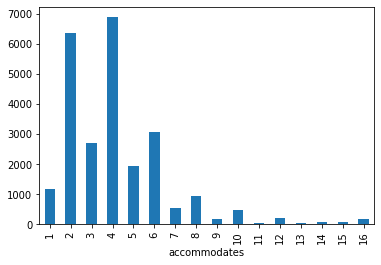

In [ ]:
somatorio = (hospedagens['accommodates'] - hospedagens['accommodates'].astype('int')).sum()

print('Verificando se tem valores float ou se são todos inteiros:', somatorio)

print('Número máximo de hospedes:', max(hospedagens['accommodates']), '\n')

hospedagens['accommodates'] = hospedagens['accommodates'].astype('int')

agrupadoQtdHospedes = hospedagens['accommodates'].groupby(hospedagens['accommodates']).count()

agrupadoQtdHospedes.plot.bar()
plt.show()

#####**Propriedade e tipo de quarto** 

Tratando as diferentes opções de propriedade (padronizando):

In [ ]:
substituir = {
      'private room in rental unit' : 'rental unit',
      'entire rental unit' : 'rental unit',
      'entire villa' : 'villa',
      'entire loft': 'loft',
      'entire home': 'house',
      'shared room in home' : 'house',
      'private room in home' : 'house',
      'private room in bed and breakfast' : 'bed and breakfast',
      'entire condo' : 'condo',
      'entire serviced apartment' : 'serviced apartment',
      'private room in guest suite' : 'apt/house',
      'earthen home' : 'earthen house',
      'casa particular' : 'house',
      'private room in condo' : 'condo',
      'entire guesthouse' : 'house',
      'shared room in rental unit' : 'rental unit',
      'private room in boat' : 'boat',
      'private room in serviced apartment' : 'serviced apartment',
      'private room in casa particular' : 'house',
      'private room in villa' : 'villa',
      'shared room in hostel': 'hostel',
      'room in serviced apartment' : 'serviced apartment',
      'private room' : 'apt/house',
      'room in hotel' : 'hotel',
      'private room in townhouse' : 'townhouse',
      'private room in loft' : 'loft',
      'entire townhouse' : 'townhouse',     
      'entire guest suite' : 'apt/house',
      'shared room in bed and breakfast' : 'bed and breakfast', 
      'entire chalet' :  'chalet',
      'room in aparthotel' : 'hotel', 
      'private room in hostel' : 'hostel', 
      'room in hostel' : 'hostel',
      'shared room in condo' : 'condo', 
      'room in boutique hotel' : 'hotel',
      'entire vacation home': 'house', 
      'tiny home' : 'house',
      'private room in nature lodge' :'nature lodge', 
      'entire cottage': 'cottage', 
      'entire place' : 'apt/house',
      'private room in castle' : 'castle', 
      'private room in guesthouse' : 'house',
      'shared room in guest suite' :  'apt/house', 
      'room in bed and breakfast': 'bed and breakfast',
      'shared room in villa' : 'villa',  
      'shared room in bungalow': 'bungalow',
      'entire bed and breakfast' : 'bed and breakfast', 
      'private room in tiny home' : 'house',
      'entire bungalow': 'bungalow', 
      'private room in cottage' : 'cottage',
      'private room in bungalow' : 'bungalow', 
      'shared room in nature lodge' : 'nature lodge', 
      'shared room': 'apt/house', 
      'shared room in loft': 'loft',
      'shared room in earthen home': 'earthen house', 
      'entire cabin': 'cabin', 
      'shared room in cottage': 'cottage',
      'private room in earthen home' : 'earthen house',
      'shared room in casa particular': 'house',
      'private room in floor': 'floor', 
      'shared room in boutique hotel': 'hotel',
      'shared room in tiny home': 'house', 
      'shared room in guesthouse': 'house',
      'private room in tent': 'tent', 
      'farm stay': 'farm', 
      'houseboat' : 'boat',
      'private room in vacation home': 'house', 
      'private room in farm stay' : 'farm',
      'private room in treehouse' : 'treehouse', 
      'private room in chalet': 'chalet',
      'private room in cabin': 'cabin', 
      'shared room in serviced apartment': 'serviced apartment',
      'private room in barn' : 'barn',  
      'private room in resort': 'resort',
      'entire home/apt': 'apt/house', 
      'room in nature lodge': 'nature lodge'
}

In [ ]:
print('Procurando nulos na coluna property_type:', hospedagens['property_type'].isnull().sum())

print('Procurando nulos na coluna room_type:', hospedagens['room_type'].isnull().sum())

hospedagens['property_type'] = normalizaNome(hospedagens['property_type'])

property_type = []

for item in hospedagens['property_type']:
    property_type.append(substituir[item] if item in substituir else item)

hospedagens['property_type_cleaned'] = property_type

tipoHospedagem = hospedagens.groupby(['property_type_cleaned'], as_index=False).size()

Procurando nulos na coluna property_type: 0
Procurando nulos na coluna room_type: 0


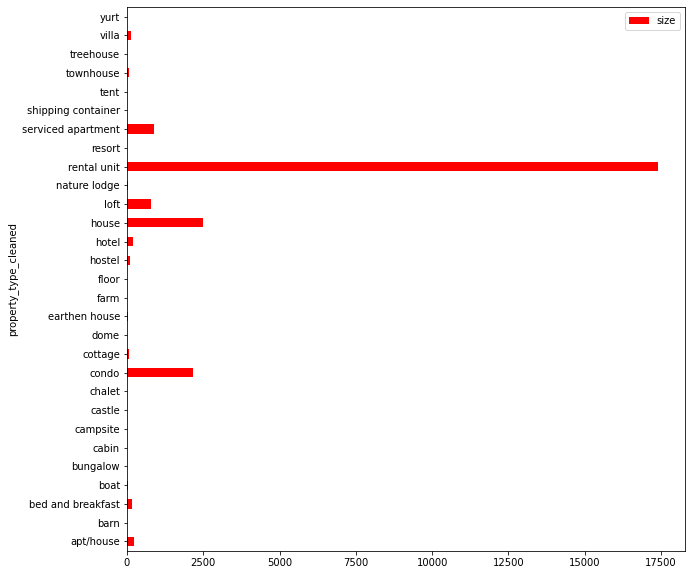

In [ ]:
tipoHospedagem.plot.barh(x = 'property_type_cleaned', figsize=(10,10), cmap = plt.get_cmap("autumn"))
plt.show()

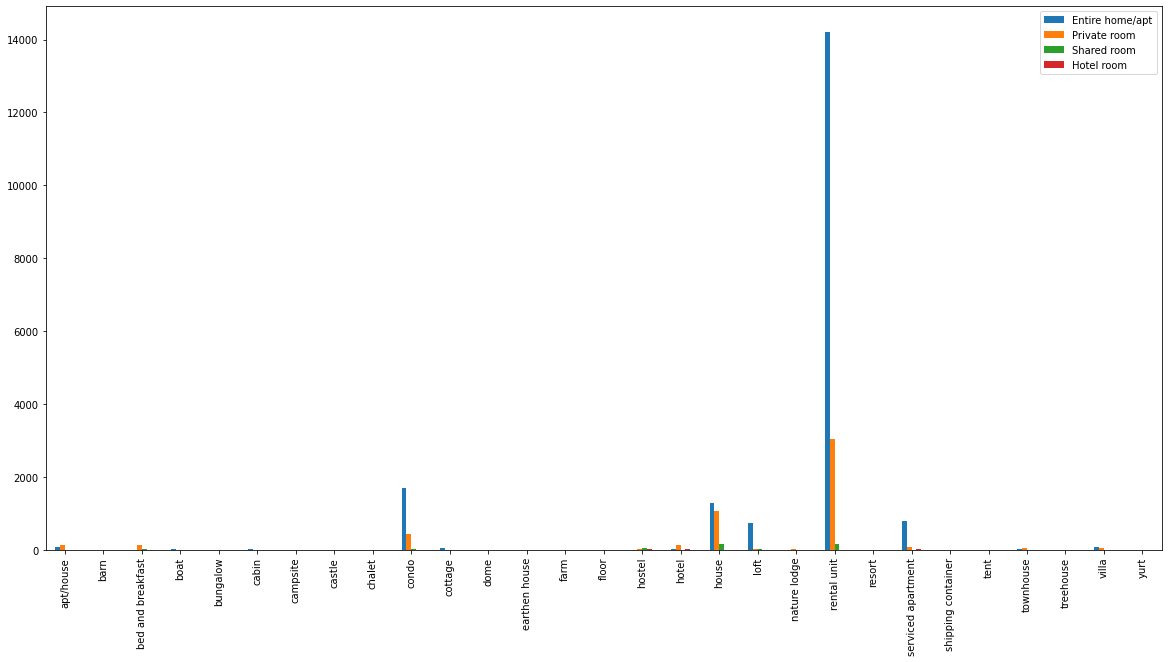

In [ ]:
propertyXroom = hospedagens.groupby(['property_type_cleaned', 'room_type'],as_index=False).size()

propertyUnique = propertyXroom['property_type_cleaned'].unique()

roomUnique = propertyXroom['room_type'].unique()

array = []
valores = []

# adicionar os labels que estão faltando, com o valor 0, para construção do grafico
for item in propertyUnique:
  separaEmGrupos = propertyXroom[propertyXroom['property_type_cleaned'] == item]

  faltante = list(set(roomUnique) - set(separaEmGrupos['room_type']))
  
  for i in faltante:
    array.append([item, i, 0])
  
if len(array) > 0:
  df2 = pd.DataFrame(array, columns=['property_type_cleaned', 'room_type', 'size'])
  
  propertyXroom = pd.concat([propertyXroom, df2], ignore_index=True)

# montando o array de arrays que irá para o gráfico
for item in propertyUnique:
  separaEmGrupos = propertyXroom[propertyXroom['property_type_cleaned'] == item]
    
  valores.append([separaEmGrupos[separaEmGrupos['room_type'] == 'Entire home/apt']['size'].values[0],
                  separaEmGrupos[separaEmGrupos['room_type'] == 'Private room']['size'].values[0],
                  separaEmGrupos[separaEmGrupos['room_type'] == 'Shared room']['size'].values[0],
                  separaEmGrupos[separaEmGrupos['room_type'] == 'Hotel room']['size'].values[0]])

resultado = pd.DataFrame(valores, index=propertyUnique)

resultado.columns = roomUnique

resultado.plot.bar(figsize = (20,10))
plt.show()

#####**Amenities (facilidades)** 

Separando cada array de itens em itens individuais, contando cada um e agrupando:

In [ ]:
#separando todas as amenities
replace = '|'.join(['\"','\'','\[','\]'])

arrayAmenities = []

for item in hospedagens['amenities']:
  arrayAmenities = arrayAmenities + re.sub(replace, '', item).split(',')

Total de itens:

In [ ]:
len(arrayAmenities) 

532600

In [ ]:
values = set(map(lambda x:x.lower().strip(), arrayAmenities))

resultado = {}

#contando quanto aparece de cada facilidade
for x in values:
  resultado[x] = 0

  for y in arrayAmenities:
    if y.lower().strip() == x:
      resultado[x] = resultado[x] + 1
      
resultado

{'': 16,
 'posso fornecer (sob consulta) no kit por diaria conditioner': 1,
 'tressem\\u00e9 shampoo': 1,
 'coock top 4 bocas stove': 1,
 'xxx shampoo': 1,
 'suggar stove': 1,
 'brastemp  stainless steel gas stove': 8,
 'chad cosm\\u00e9ticos  body soap': 1,
 'sach\\u00ea body soap': 1,
 'sabonete liquido body soap': 9,
 'fast wifi \\u2013 299 mbps': 2,
 'fast wifi \\u2013 261 mbps': 3,
 'com \\u00e1gua sempre geladas  refrigerator': 1,
 'harus body soap': 5,
 'c\\u00f4nsul  gas stove': 2,
 'x body soap': 1,
 'continental  stainless steel gas stove': 1,
 'electric oven  stainless steel oven': 1,
 'protex l\\u00edquido body soap': 1,
 '320\\ hdtv with amazon prime video': 1,
 'freezer': 2700,
 'johnson\\u2019s body soap': 1,
 '45\\ hdtv with netflix': 4,
 '39\\ hdtv with standard cable': 1,
 'electric stove': 174,
 'consul evox refrigerator': 1,
 'tresemme shampoo': 1,
 'free parking garage on premises \\u2013 4 spaces': 1,
 'sugar gas stove': 1,
 'naturgy erva doce shampoo': 2,
 'samsu

In [ ]:
data = {'facilidades': resultado.keys(), 'total': resultado.values()}
facilidades = pd.DataFrame.from_dict(data)
 
#removendo string vazia 
facilidades['facilidades'].replace('', np.nan, inplace=True)
facilidades.dropna(inplace=True)

facilidades = facilidades.sort_values(by=['facilidades'])

facilidades.head(5)

,facilidades,total
387,(basic) body soap,2
1566,* body soap,2
1734,. bluetooth sound system,1
1063,. body soap,1
1943,. conditioner,2


In [ ]:
print('Listados ', len(facilidades), " facilidades totais e total palavras é", facilidades['total'].sum()) 

maioriaFacilidade = facilidades[facilidades['total'] > 20]

print('Dessas facilidades, há ', len(maioriaFacilidade), ' tipos de itens com mais de 20 unidades')

facilidadesFiltradas = set(maioriaFacilidade['facilidades'])

Listados  2697  facilidades totais e total palavras é 532584
Dessas facilidades, há  285  tipos de itens com mais de 20 unidades


Agrupando os tipos de facilidades em grupos maiores para facilitar a análise, e fazendo uma análise mais geral:

In [ ]:
substituir = {
    'gym': 'academia',
    'lake access':'acesso lago',
    'hot water': 'agua quente',
    'carbon monoxide alarm': 'alarme de fumaça',
    'smoke alarm': 'alarme de fumaça',
    'heating': 'aquecedor',
    'air conditioning': 'ar condicionado',
    'window ac unit': 'ar condicionado',
    

    'hot tub': 'banheira',
    'bathtub': 'banheira',
    'beachfront': 'beira mar',
    'waterfront': 'beira mar',
    'bidet': 'bidê',
    'bikes': 'bicicletas',
    'toys': 'brinquedos',

    'high chair': 'cadeira',
    'breakfast': 'cafe da manha',
    'coffee maker': 'cafeteira',
    'nespresso machine': 'cafeteira',
    'pour-over coffee': 'cafeteira',
    'keurig coffee machine': 'cafeteira',
    '2 caixas de 45w cada': 'caixa de som',
    'record player': 'caixa de som',
    'security cameras': 'cameras de segurança',
    'lockbox': 'cofre',
    'safe': 'cofre',
    'conditioner': 'condicionador',
    'room-darkening shades':'cortina',
    'kitchen': 'cozinha',
    'bbq grill':'churrasqueira',
    'outdoor shower': 'chuveiro externo',

    'private entrance': 'entrada privativa',
    'elevator': 'elevador',
    'drying rack for clothing': 'escorredor de roupa',
    'dedicated workspace': 'espaço de trabalho',
    'fire extinguisher': 'extintor de incêndio',

    'building staff': 'faxineira, zelador',
    'iron': 'ferro de passar',
    'lock': 'fechaduras',
    'stove': 'fogao',
    '4 bocas': 'fogao',
    'oven': 'forno',
    'forno': 'forno',

    'garage': 'garagem',
    'parking': 'garagem',
    'bottled water': 'garrafas de água',
    'freezer' : 'geladeira',
    'refrigerator': 'geladeira',
    'electrolux': 'geladeira',
    '342 l': 'geladeira',
    'window guards': 'grade na janela',
    'closet': 'guarda-roupa',
    'dresser': 'guarda-roupa',
    'wardrobe': 'guarda-roupa',
    'clothing storage': 'guarda-roupa',
    'hangers': 'guarda-roupa',

    'ethernet connection': 'internet por cabo',
    'changing table': 'itens para bebes',
    'baby bath': 'itens para bebes',
    'baby monitor': 'itens para bebes',
    'baby safety gates': 'itens para bebes',
    'babysitter recommendations': 'itens para bebes',
    'crib': 'itens para bebes',
    'shower gel': 'itens de higiene',
    'realgem': 'itens de higiene',
    'bathroom essentials': 'itens de higiene',
    'beach essentials': 'itens de praia',
    'children': 'itens para crianças',
    'dove': 'itens de higiene',

    'backyard': 'jardim',
    'board games': 'jogos de tabuleiro',

    'indoor fireplace': 'lareira',
    'fire pit': 'lareira',
    'cleaning before checkout': 'limpeza antes do checkout',

    'washer': 'maquina de lavar',
    'laundry services': 'maquina de lavar',
    'laundromat': 'maquina de lavar',
    'dining table': 'mesa de jantar',
    'microwave': 'microondas',

    'airport shuttle': 'onibus de aeroporto',

    'ping pong table': 'mesa de ping-pong',

    'long term stays allowed': 'permanencia longa',
    'piano': 'piano',
    'first aid kit': 'primeiros-socorros',
    'cleaning products': 'produtos de limpeza',
    '2-5 years old' : 'proprio para criança',
    '5-10 years old': 'proprio para criança',
    'and 10+ years old': 'proprio para criança',
    'and 5-10 years old': 'proprio para criança',
    'pool': 'piscina',
    'table corner guards': 'protetor de quina de mesa',

    'boat slip': 'rampa para barcos',

    'sauna': 'sauna',
    'soap': 'sabonete',
    'balcony': 'sacada',
    'dryer': 'secador',
    'shampoo': 'shampoo',
    'sound system': 'sistema de som',

    'keypad': 'teclado',
    'toaster': 'torradeira',
    'bread maker': 'torradeira',
    'pillows': 'travesseiros e cobertores',
    'bed linens': 'travesseiros e cobertores',
    'bedroom comforts': 'travesseiros e cobertores',
    'tv' : 'tv',
    'amazon prime video': 'tv',
    'aiwa': 'tv',
    'hbo max': 'tv',
    'netflix': 'tv',
    'premium cable': 'tv',
    'roku': 'tv',

    'ceiling fan': 'ventilador',
    'portable fans': 'ventilador',
    'xbox': 'video game',
    'game console': 'video game',
    'wine glasses': 'vinho',

    'rice maker': 'utensilios cozinha',
    'mini fridge': 'utensilios cozinha',
    'dishes and silverware': 'utensilios cozinha',
    'baking sheet': 'utensilios cozinha',
    'barbecue utensils': 'utensilio churrasco',

    'wifi': 'wi-fi',
}

Reagrupando com o novo dicionário (acima):

In [ ]:
novoAgrupamento = [] 

for item in facilidadesFiltradas:
  controle = False

  for key, value in substituir.items():
    if key in item:
      controle = True
      novoAgrupamento.append(value) 
  
  if not controle:
      novoAgrupamento.append(item) 

print('Novo número de itens agrupados com o dicionário acima:', len(set(novoAgrupamento)))

Novo número de itens agrupados com o dicionário acima: 87


In [ ]:
novoArray = {}

facilidadesFiltradasMaior20itens = maioriaFacilidade.copy()

facilidadesFiltradasMaior20itens['facilidades'] = normalizaNome(facilidadesFiltradasMaior20itens['facilidades'])

print('Total palavras:', facilidadesFiltradasMaior20itens['total'].sum())

for indice, item in enumerate(facilidadesFiltradasMaior20itens['facilidades']):

  controle = False

  for key, value in substituir.items():       
      if key in item:
        controle = True
        
        if value in novoArray:
          novoArray[value] = novoArray[value] + facilidadesFiltradasMaior20itens.iloc[indice]['total']

        else:
          novoArray[value] = facilidadesFiltradasMaior20itens.iloc[indice]['total']

        break

  if not controle: 
      novoArray[item] = facilidadesFiltradasMaior20itens.iloc[indice]['total']

data = {'facilidades': novoArray.keys(), 'total': novoArray.values()}
agrupadoAmenities = pd.DataFrame.from_dict(data)

Total palavras: 527446


In [ ]:
agrupadoAmenities.sort_values(by=['facilidades'])

,facilidades,total
52,academia,3999
59,acesso lago,548
55,agua quente,17155
27,alarme de fumaça,6166
29,aquecedor,1825
2,ar condicionado,20460
10,banheira,2672
13,beira mar,4292
16,bicicletas,224
15,bidê,480


Total de registros:

In [ ]:
agrupadoAmenities['total'].sum()

527446

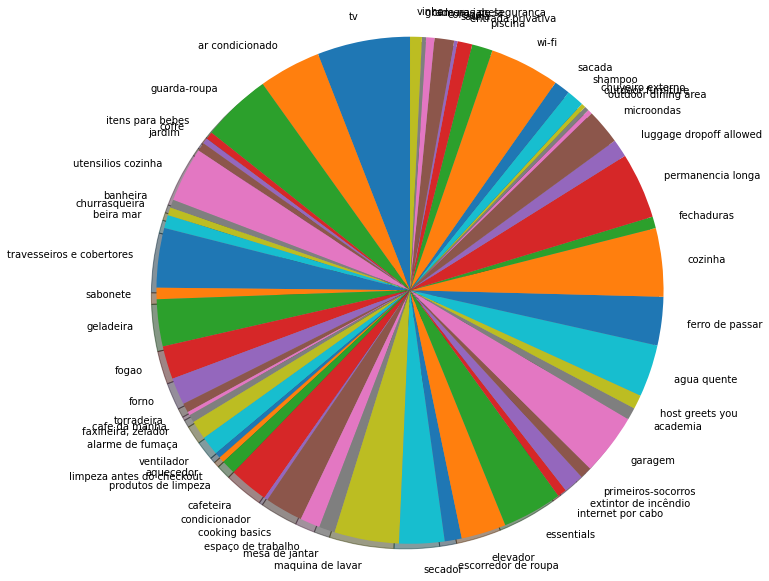

In [ ]:
agrupadoMaisDe1000= agrupadoAmenities[agrupadoAmenities['total'] > 1000]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(agrupadoMaisDe1000['total'], labels=agrupadoMaisDe1000['facilidades'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#####**Bedrooms (quartos)**

Verificando nulos e tratando:

In [ ]:
nulos = hospedagens['bedrooms'].isnull().sum()

print('Bedrooms Nulos:', nulos)

totalRegistros = len(hospedagens['bedrooms'])

print('Porcentagem de nulos:', nulos * 100 / totalRegistros, '%')

hospedagens['bedrooms'].describe()

Bedrooms Nulos: 1361
Porcentagem de nulos: 5.497435068869411 %


count    23396.000000
mean         1.701103
std          1.094016
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         47.000000
Name: bedrooms, dtype: float64

Até 90% das hospedagens tem 3 bedrooms:

In [ ]:
hospedagens['bedrooms'].quantile(q=0.9)

3.0

In [ ]:
hospedagens['bedrooms'] = hospedagens['bedrooms'].fillna(1.0)

bedrooms = hospedagens['bedrooms'].groupby(hospedagens['bedrooms']).size()

bedrooms

bedrooms
1.0     14453
2.0      6245
3.0      2941
4.0       700
5.0       222
6.0       115
7.0        32
8.0        11
9.0        11
10.0       11
11.0        5
12.0        3
15.0        2
17.0        1
18.0        1
20.0        2
30.0        1
47.0        1
Name: bedrooms, dtype: int64

Verificando se todos os valores são inteiros ou se tem float:

In [ ]:
verificarSeInteiro = (hospedagens['bedrooms'] - hospedagens['bedrooms'].astype('int')).sum()

print(verificarSeInteiro, '\n')

hospedagens['bedrooms'] = hospedagens['bedrooms'].astype('int')

0.0 



Verificar as caracteristicas de hospedagens acima de 20 quartos:

In [ ]:
hoteis =  hospedagens[hospedagens['bedrooms'] >= 20]

novoDataFrame = {
    'name' : hoteis['name'],
    'bedroom' : hoteis['bedrooms'],
    'beds': hoteis['beds'],
    'listing_url': hoteis['listing_url']
}

pd.DataFrame(novoDataFrame)

,name,bedroom,beds,listing_url
655,Clube pontal festas passeios e hospedagens,30,11.0,https://www.airbnb.com/rooms/39079159
1341,Hotel Yoo2 Rio De Janeiro By Intercity - Yoo2 ...,47,1.0,https://www.airbnb.com/rooms/51983231
18863,FLATS PONTAL COUNTRY CLUB,20,4.0,https://www.airbnb.com/rooms/11552931
19118,PONTAL COUNTRY CLUB,20,6.0,https://www.airbnb.com/rooms/11823167


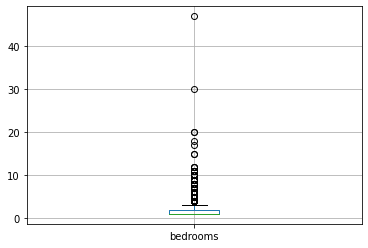

In [ ]:
hospedagens.boxplot('bedrooms')
plt.show()

Removerei os outliers acima de 10 bedrooms:

In [ ]:
acima10Bedrooms = len(hospedagens[hospedagens['bedrooms'] >10])

total = hospedagens.shape[0]

print(acima10Bedrooms, 'de', total, 'tem bedrooms acima de 10, ou seja, ', acima10Bedrooms * 100 / total ,'% do total')

16 de 24757 tem bedrooms acima de 10, ou seja,  0.06462818596760513 % do total


In [ ]:
hospedagensComOutlier = hospedagens.copy() #para plotar gráfico com outliers

indexes = hospedagens[hospedagens['bedrooms'] >10].index

hospedagens.drop(index = indexes, inplace= True)

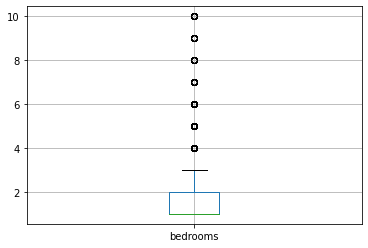

In [ ]:
hospedagens.boxplot('bedrooms')
plt.show()

In [ ]:
hospedagens['bedrooms'].describe()

count    24741.000000
mean         1.652601
std          0.974308
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: bedrooms, dtype: float64

#####**Beds (camas)** 

Verificando nulos:

In [ ]:
nulos = hospedagens['beds'].isnull().sum()

print('Colunas com bed Nulas:', nulos)

totalRegistros = len(hospedagens['beds'])

print('Porcentagem de nulos:', nulos * 100 / totalRegistros, '%')

hospedagens['beds'].describe()

Colunas com bed Nulas: 244
Porcentagem de nulos: 0.9862172102986945 %


count    24497.000000
mean         2.600890
std          2.149792
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         91.000000
Name: beds, dtype: float64

Analisando outliers:

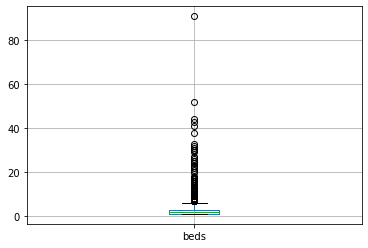

In [ ]:
hospedagens['beds'] = hospedagens['beds'].fillna(1)

hospedagens['beds'] = hospedagens['beds'].astype('int')

hospedagens.boxplot('beds')
plt.show()

In [ ]:
beds = hospedagens['beds'].groupby(hospedagens['beds']).size()
beds

beds
1     8122
2     7008
3     4345
4     2467
5     1213
6      715
7      255
8      224
9       94
10     104
11      38
12      38
13      24
14      16
15      12
16      27
17       7
18       3
20       3
21       1
22       1
23       3
24       2
25       2
26       1
27       2
29       1
30       4
31       1
32       1
33       1
38       1
41       1
43       1
44       1
52       1
91       1
Name: beds, dtype: int64

Analisando valores de bed acima de 20:

In [ ]:
hoteis =  hospedagens[hospedagens['beds'] >= 20]

novoDataframe = {
    'name' : hoteis['name'],
    'bedroom' : hoteis['bedrooms'],
    'beds': hoteis['beds'],
    'listing_url': hoteis['listing_url']
}

pd.DataFrame(novoDataframe).sort_values('beds', ascending=False).head(10)

,name,bedroom,beds,listing_url
18961,House near best beaches in Rio,5,91,https://www.airbnb.com/rooms/10283474
24707,Sítio Bonanza,5,52,https://www.airbnb.com/rooms/40344257
20013,Pousada Maanaim,1,44,https://www.airbnb.com/rooms/39795504
2659,Terraço - Coletive LapaHouse Music,1,43,https://www.airbnb.com/rooms/35477109
19594,Quartos na Fazenda Alegria,5,41,https://www.airbnb.com/rooms/13427108
18856,Hospedagem clube pontal para ate 100 pessoas,2,38,https://www.airbnb.com/rooms/27923558
8367,Hospedagem clube PONTAL,1,33,https://www.airbnb.com/rooms/22779331
6675,Casa c/ até 32 leitos - House: upto 32 guests/...,5,32,https://www.airbnb.com/rooms/41016068
12445,sitio no Rio de Janeiro,1,31,https://www.airbnb.com/rooms/51086309
4431,"Quarto Individual Solteiro, Casal e Compartilhado",1,30,https://www.airbnb.com/rooms/562829863272250207


Removendo outliers acima de 10 camas:

In [ ]:
acima10Beds = len(hospedagens[hospedagens['beds'] >10])

total = hospedagens.shape[0]

print(acima10Beds, 'de', total, 'tem beds acima de 10, ou seja, ', round(acima10Beds * 100 / total) ,'% do total')

194 de 24741 tem beds acima de 10, ou seja,  1 % do total


In [ ]:
indexes = hospedagens[hospedagens['beds'] >10].index

hospedagens.drop(index = indexes, inplace= True)

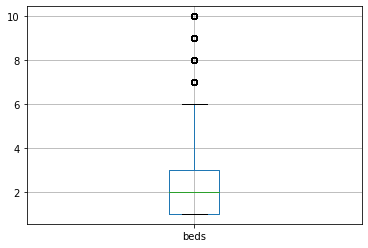

In [ ]:
hospedagens.boxplot('beds')
plt.show()

In [ ]:
hospedagens['beds'].describe()

count    24547.000000
mean         2.479285
std          1.624216
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: beds, dtype: float64

Sem muitos outliers:


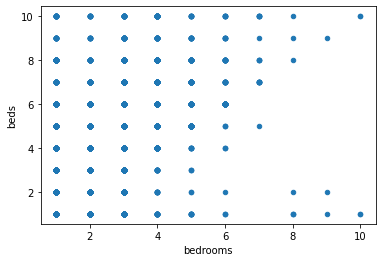

Com outliers:


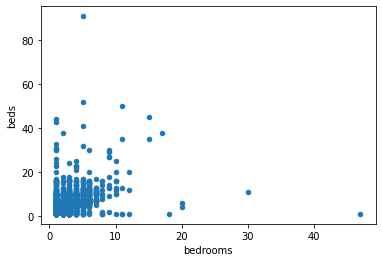

In [ ]:
novoDataFrame = {
    'bedrooms' : hospedagens['bedrooms'],
    'beds': hospedagens['beds']
}

novoDataFrame = pd.DataFrame(novoDataFrame)

print('Sem muitos outliers:')
novoDataFrame.plot.scatter(x='bedrooms', y='beds')
plt.show()

print('Com outliers:')
hospedagensComOutlier.plot.scatter(x='bedrooms', y='beds')
plt.show()


#####**Price (preços)** 
Sem nulos:

In [ ]:
hospedagens['price'].isnull().sum()

0

In [ ]:
hospedagens['price'].head(5)

0       $150.00
1       $774.00
2     $1,136.00
3       $500.00
4    $10,000.00
Name: price, dtype: object

In [ ]:
#removendo sinal do dolar e a virgula
precos = hospedagens['price'].replace('\$|\,', '', regex=True) 

# separando o decimal para ver se da pra transformar tudo em inteiro
regex = '([0-9]*)(\.)([0-9]*)'

decimais = precos.replace(regex, '\\3', regex=True) 

#verificando que todos os numeros sao inteiros
print('Se a soma de todos os decimais for iguais a 0, os valores do preço podem transformados em inteiros:', decimais.astype('int').sum(), '\n')

#transformando em inteiro
precos = precos.replace('\.[0-9]*', '', regex=True).astype('int')

precos.head(5)

Se a soma de todos os decimais for iguais a 0, os valores do preço podem transformados em inteiros: 0 



0      150
1      774
2     1136
3      500
4    10000
Name: price, dtype: int64

Verificando se tem valores zerados:

In [ ]:
precos[precos == 0].count()

0

In [ ]:
precos.describe()

count     24547.000000
mean        737.586100
std        5010.541113
min          33.000000
25%         180.000000
50%         300.000000
75%         599.000000
max      591723.000000
Name: price, dtype: float64

In [ ]:
precos.sort_values(ascending=False).head(5)

18714    591723
8483     316450
16067    130000
17592    129068
11180    102811
Name: price, dtype: int64

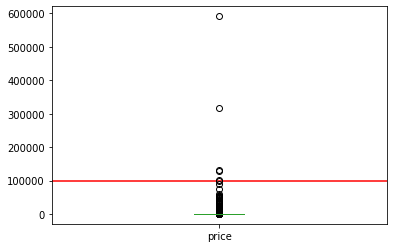

In [ ]:
plt.axhline(y=100000, c='red') 

precos.plot.box()
plt.show()

In [ ]:
hospedagens['preco'] = precos

hospedagens['preco'].astype('int')

precosAgrupados = hospedagens.groupby('preco', as_index=False).size()

precosAgrupados.head(5)

,preco,size
0,33,1
1,34,1
2,35,1
3,39,2
4,40,2


In [ ]:
maioresPrecos = precosAgrupados[precosAgrupados['preco'] >100000]['size'].sum()

precosAcima10Mil = precosAgrupados[precosAgrupados['preco'] >10000]['size'].sum()

print(maioresPrecos, 'hospedagens tem valores diários acima de 100 mil de', precos.count(), 'hospedagens e')

print(precosAcima10Mil, 'hospedagens tem valores diários acima de 10 mil')

5 hospedagens tem valores diários acima de 100 mil de 24547 hospedagens e
119 hospedagens tem valores diários acima de 10 mil


In [ ]:
# Verificando a hospedagem com preço máximo
precoMaximo = max(hospedagens['preco'])

hospedagens[hospedagens['preco'] == precoMaximo]

,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,bathrooms_type,property_type_cleaned,preco
18714,https://www.airbnb.com/rooms/13879989,Temporary rentals for Brazilian Cup.,My home is my heaven here in the neighborhood ...,"Restaurants, bars, busy streets, pizzerias, etc.",https://a0.muscache.com/pictures/594321ef-729a...,82046629,https://www.airbnb.com/users/show/82046629,Elizabeth,2016-07-06,"Rio de Janeiro, State of Rio de Janeiro, Brazil",Bom sou uma pessoa que gosta da casa cheia sou...,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone']",t,f,"Rio de Janeiro, Brazil",São Cristóvão,-2289993.0,-4323033.0,shared room in home,Shared room,5,1 shared bath,1,4,"[""TV"", ""Air conditioning"", ""Wifi"", ""Kitchen""]","$591,723.00",6.0,8.0,6.0,6.0,8.0,8.0,6.0,8.0,t,30.0,60.0,90.0,365.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1.0,0.0,0.0,1.0,NaN,1,shared,house,591723


In [ ]:
indexes = hospedagens[hospedagens['preco']>10000].index

hospedagens.drop(indexes, inplace=True)

In [ ]:
# verificar se mudou os valores de outliers
len(hospedagens[hospedagens['preco']>10000])

0

Novo Tamanho do dataset:

In [ ]:
len(hospedagens)

24428

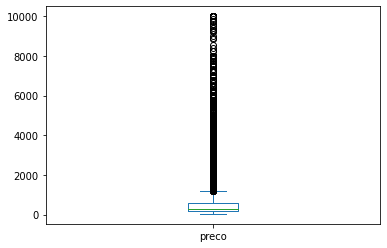

In [ ]:
hospedagens['preco'].plot.box()
plt.show()

In [ ]:
hospedagens['preco'].describe()

count    24428.000000
mean       569.771574
std        896.526608
min         33.000000
25%        179.000000
50%        300.000000
75%        590.000000
max      10000.000000
Name: preco, dtype: float64

In [ ]:
len(hospedagens[hospedagens['preco']>2000])

1007

In [ ]:
bins = [i for i in range(0,10500,500)]

listaDeTuplas = [(item, bins[index+1]) for index, item in enumerate(bins) if index < (len(bins) - 1)]

bins = pd.IntervalIndex.from_tuples(listaDeTuplas)

agrupados = hospedagens.groupby('preco', as_index=False).size()

agrupados['faixaValores'] = pd.cut(agrupados['preco'], bins = bins, labels = False)

In [ ]:
agrupamentoBins = agrupados.groupby('faixaValores')['size'].sum()

agrupamentoBins

faixaValores
(0, 500]         17516
(500, 1000]       4039
(1000, 1500]      1246
(1500, 2000]       620
(2000, 2500]       248
(2500, 3000]       197
(3000, 3500]       118
(3500, 4000]        85
(4000, 4500]        56
(4500, 5000]        81
(5000, 5500]        46
(5500, 6000]        41
(6000, 6500]        23
(6500, 7000]        19
(7000, 7500]        16
(7500, 8000]        28
(8000, 8500]         4
(8500, 9000]         4
(9000, 9500]         7
(9500, 10000]       34
Name: size, dtype: int64

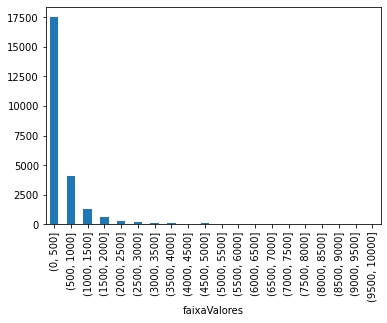

In [ ]:
agrupamentoBins.plot.bar()
plt.show()

#####**Outros atributos** 

Ano de entrada de anfitriões:

In [ ]:
print('Quantos nulos:', hospedagens['host_since'].isnull().sum())

Quantos nulos: 0


Primeiro host cadastrado: 2008-10-13 00:00:00
Último host cadastrado até o momento: 2022-06-18 00:00:00 



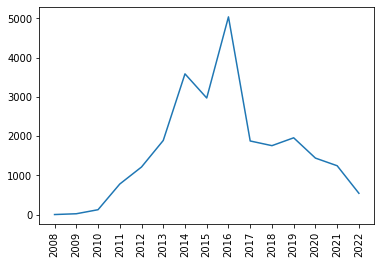

In [ ]:
print("Primeiro host cadastrado:", min(hospedagens['host_since']))

print("Último host cadastrado até o momento:", max(hospedagens['host_since']), '\n')

#hospedagens['host_since'].dropna(inplace=True)

host_since = hospedagens['host_since'].apply(lambda x: x.strftime('%Y')) #-%m

resultado = host_since.value_counts().rename_axis('datas').reset_index(name='total')
resultado = resultado.sort_values(by='datas')

#resultado = host_since.groupby(host_since).size().to_frame('size')

plt.plot(resultado['datas'], resultado['total'])
plt.xticks(rotation='vertical')
plt.show()

Aproveitando somente o ano de entrada:

In [ ]:
hospedagens['host_since'] = host_since

#####**Combinações entre quartos, camas, tipo de propriedade, tipo de quarto, facilidades que a hospedagem oferece e preços** 

Sem outliers:


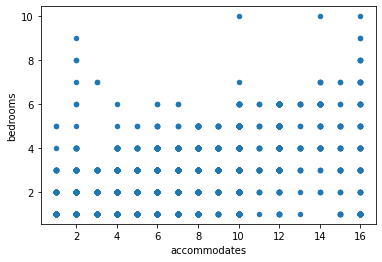

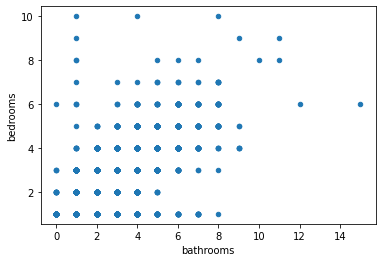

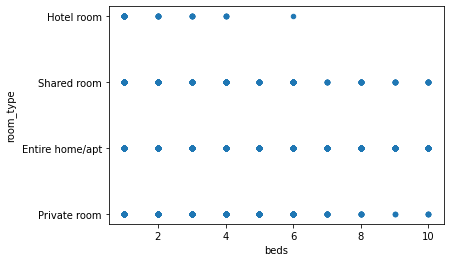

In [ ]:
novoDataframe = {
    'bathrooms_type': hospedagens['bathrooms_type'],
    'bathrooms': hospedagens['bathrooms'],
    'accommodates': hospedagens['accommodates'],
    'bedrooms' : hospedagens['bedrooms'],
    'beds': hospedagens['beds'],

    'property_type': hospedagens['property_type_cleaned'],
    'room_type': hospedagens['room_type'],
    'preco': hospedagens['preco'],
}

novoDataFrame = pd.DataFrame(novoDataframe)

print('Sem outliers:')
novoDataFrame.plot.scatter(x='accommodates', y='bedrooms')
plt.show()

novoDataFrame.plot.scatter(x='bathrooms', y='bedrooms')
plt.show()

novoDataFrame.plot.scatter(fig = (10,10), x='beds', y='room_type')
plt.show()

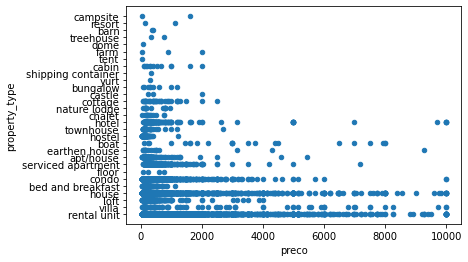

In [ ]:
novoDataFrame.plot.scatter(fig = (30,30), x='preco', y='property_type')
plt.show()

Com outliers:

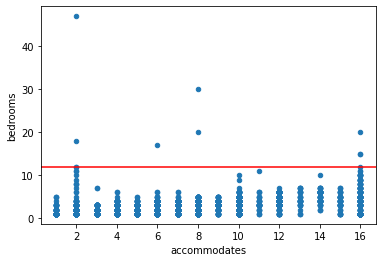

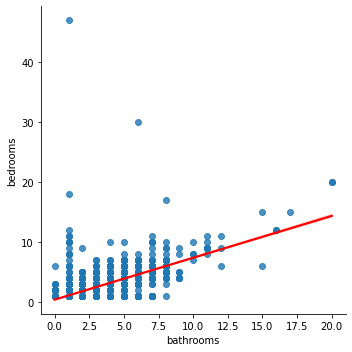

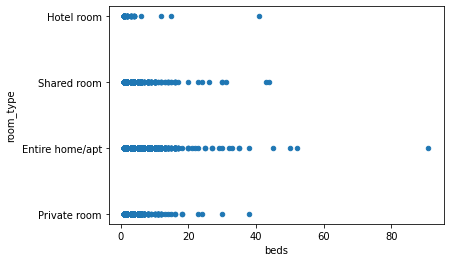

In [ ]:
hospedagensComOutlier.plot.scatter(x='accommodates', y='bedrooms')
plt.axhline(y=12, c='red') 
plt.show()

#hospedagensComOutlier.plot.scatter(x='bathrooms', y='bedrooms')
sb.lmplot(x="bathrooms", y="bedrooms", data=hospedagensComOutlier, line_kws={"color": "red"});
plt.show()

hospedagensComOutlier.plot.scatter(fig = (10,10), x='beds', y='room_type')
plt.show()

#### **Removendo colunas de análise**

Uma vez que as análises da database de hospedagem já foram feitas, podemos excluir mais colunas, que primeiramente foram utilizadas para auxilar nessas análises, mas não serão uteis na resolução do problema em si.

In [ ]:
(hospedagens.drop(['listing_url'], axis=1, inplace=True) if 'listing_url' in hospedagens else '')

(hospedagens.drop(['host_about'], axis=1, inplace=True) if 'host_about' in hospedagens else '')

(hospedagens.drop(['host_name'], axis=1, inplace=True) if 'host_name' in hospedagens else '')

(hospedagens.drop(['host_url'], axis=1, inplace=True) if 'host_url' in hospedagens else '')

(hospedagens.drop(['name'], axis=1, inplace=True) if 'name' in hospedagens else '')

(hospedagens.drop(['description'], axis=1, inplace=True) if 'description' in hospedagens else '')

(hospedagens.drop(['bathroom_text'], axis=1, inplace=True) if 'bathroom_text' in hospedagens else '')

(hospedagens.drop(['neighborhood_overview'], axis=1, inplace=True) if 'neighborhood_overview' in hospedagens else '')

(hospedagens.drop(['price'], axis=1, inplace=True) if 'price' in hospedagens else '')

In [ ]:
hospedagens.shape

(24428, 59)

Verificando correlação:

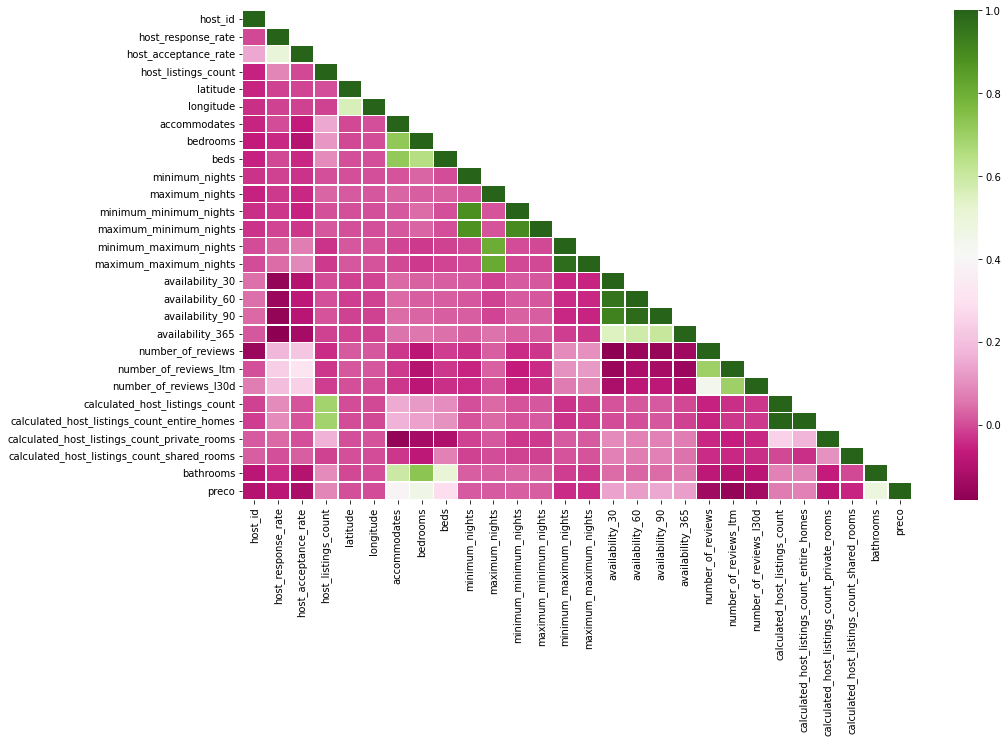

In [ ]:
correlacao = hospedagens.corr()

arrayDeUm = np.ones_like(correlacao, dtype=bool) # cria uma estrutura igual o correlação, so que com valores 1, ou bool, ou float..

trianguloModificado = np.triu(arrayDeUm, k = 1) # retorna um array com os elementos abaixo de k

plt.subplots(figsize=(15,9))

sb.heatmap(correlacao, mask = trianguloModificado, cmap="PiYG", linewidths=0.5) #annot=True,

plt.show()

Verificando quem tem correlação positiva acima de 0.9:

In [ ]:
correlacaoPositiva = correlacao[correlacao[correlacao > 0.9] < 1.0]

resultado = (correlacaoPositiva.unstack()).sort_values()

resultado = resultado[resultado > 0.9].drop_duplicates()

resultado.unstack(1)

,maximum_minimum_nights,availability_90,availability_60,maximum_maximum_nights,calculated_host_listings_count_entire_homes
minimum_minimum_nights,0.902991,NaN,NaN,NaN,NaN
availability_30,NaN,0.920141,0.956201,NaN,NaN
minimum_maximum_nights,NaN,NaN,NaN,0.973519,NaN
availability_60,NaN,0.981081,NaN,NaN,NaN
calculated_host_listings_count,NaN,NaN,NaN,NaN,0.996392


Verificando correlação negativa de -0.9:

In [ ]:
correlacaoNegativa = correlacao[correlacao < -0.9].count().unique()
correlacaoNegativa

array([0])

Verificando menor valor:

In [ ]:
correlacao[correlacao < 0].min().sort_values()[0]

-0.18139024116198035

Removendo colunas fortemente relacionadas:

In [ ]:
(hospedagens.drop(['maximum_minimum_nights'], axis=1, inplace=True) if 'maximum_minimum_nights' in hospedagens else '')

(hospedagens.drop(['minimum_maximum_nights'], axis=1, inplace=True) if 'minimum_maximum_nights' in hospedagens else '')

(hospedagens.drop(['availability_30'], axis=1, inplace=True) if 'availability_30' in hospedagens else '')

(hospedagens.drop(['availability_60'], axis=1, inplace=True) if 'availability_60' in hospedagens else '')

(hospedagens.drop(['calculated_host_listings_count'], axis=1, inplace=True) if 'calculated_host_listings_count' in hospedagens else '')

#### **Verificações de suposição do(s) modelo(s) de Aprendizado de Máquina**

In [ ]:
hospedagens.head(5)

,picture_url,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,bathrooms_type,property_type_cleaned,preco
0,https://a0.muscache.com/pictures/4564530/8d1f8...,581488,2011,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,NaN,NaN,f,Copacabana,3.0,"['email', 'phone']",t,t,NaN,Copacabana,-2297716.0,-431937.0,private room in rental unit,Private room,1,1,1,1,"[""TV with standard cable"", ""Washer"", ""Kitchen""...",90.0,180.0,90.0,180.0,90.0,180.0,f,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0.0,1.0,0.0,NaN,1,shared,rental unit,150
1,https://a0.muscache.com/pictures/28064774/ba84...,5811581,2013,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,NaN,0.0,f,Leblon,3.0,"['email', 'phone']",t,t,NaN,Leblon,-2298353.0,-4321957.0,entire rental unit,Entire home/apt,6,2 baths,3,5,"[""TV"", ""Wifi"", ""Long term stays allowed"", ""Air...",4.0,1125.0,4.0,1125.0,4.0,1125.0,f,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,0.0,0.0,NaN,2,shared,rental unit,774
2,https://a0.muscache.com/pictures/eed4877b-9fa5...,13530621,2014,"Brasilia, Federal District, Brazil",NaN,NaN,NaN,f,Copacabana,1.0,"['email', 'phone']",t,t,NaN,Copacabana,-2296649.0,-4317957.0,entire rental unit,Entire home/apt,2,1 bath,1,2,"[""TV"", ""Kitchen"", ""Essentials"", ""Hangers"", ""Lo...",3.0,30.0,3.0,30.0,3.0,30.0,f,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,0.0,0.0,NaN,1,shared,rental unit,1136
3,https://a0.muscache.com/pictures/dd6ef7fd-44e8...,164258385,2017,"Barra da Tijuca, State of Rio de Janeiro, Brazil",NaN,NaN,NaN,f,NaN,1.0,['phone'],t,t,NaN,Barra da Tijuca,-2300574.0,-4332676.0,entire rental unit,Entire home/apt,5,2.5 baths,2,3,"[""TV"", ""Iron"", ""Washer"", ""Kitchen"", ""Essential...",7.0,30.0,7.0,30.0,7.0,30.0,f,0.0,0.0,1.0,0.0,0.0,2019-09-27,2019-09-27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,f,1.0,0.0,0.0,0.03,3,shared,rental unit,500
4,https://a0.muscache.com/pictures/9e7e9201-6c46...,606990,2011,US,NaN,NaN,NaN,f,NaN,2.0,"['email', 'phone']",t,t,NaN,Itanhangá,-2299425.0,-4330066.0,entire villa,Entire home/apt,12,8.5 baths,5,7,"[""Crib"", ""Fire extinguisher"", ""Private entranc...",7.0,1125.0,7.0,1125.0,7.0,1125.0,f,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,0.0,0.0,NaN,9,shared,villa,10000


In [ ]:
novoDataFrame.head(5)  

,bathrooms_type,bathrooms,accommodates,bedrooms,beds,property_type,room_type,preco
0,shared,1,1,1,1,rental unit,Private room,150
1,shared,2,6,3,5,rental unit,Entire home/apt,774
2,shared,1,2,1,2,rental unit,Entire home/apt,1136
3,shared,3,5,2,3,rental unit,Entire home/apt,500
4,shared,9,12,5,7,villa,Entire home/apt,10000


Com a dummerização de todas as variaveis, teremos 127 colunas:

In [ ]:
bathroom_type = novoDataFrame['bathrooms_type'].unique()

property_type = novoDataFrame['property_type'].unique()

room_type = novoDataFrame['room_type'].unique()

print(len(bathroom_type) + len(property_type) + len(room_type) + len(set(novoAgrupamento)) + 5) # 5 são as colunas numericas  

127


In [ ]:
len(novoDataFrame)

24428

##### Transformar amenities em dummys separadamente

In [ ]:
arrayDeZeros = [[0 for col in range(87)] for row in range(len(novoDataFrame))]

amenitiesDataframe = pd.DataFrame(columns=agrupadoAmenities['facilidades'], data = arrayDeZeros)

print('Shape do novo dataframe:', amenitiesDataframe.shape, '\n')

amenitiesDataframe.head(3)

Shape do novo dataframe: (24428, 87) 



facilidades,proprio para criança,tv,ar condicionado,guarda-roupa,itens para bebes,cofre,jardim,utensilios cozinha,utensilio churrasco,itens de higiene,banheira,churrasqueira,itens de praia,beira mar,travesseiros e cobertores,bidê,bicicletas,sistema de som,jogos de tabuleiro,rampa para barcos,sabonete,geladeira,fogao,forno,torradeira,cafe da manha,"faxineira, zelador",alarme de fumaça,ventilador,aquecedor,brinquedos,itens para crianças,chromecast,limpeza antes do checkout,produtos de limpeza,cafeteira,condicionador,cooking basics,espaço de trabalho,mesa de jantar,maquina de lavar,secador,escorredor de roupa,elevador,essentials,internet por cabo,ev charger,extintor de incêndio,lareira,primeiros-socorros,garagem,video game,academia,cadeira,host greets you,agua quente,ferro de passar,teclado,cozinha,acesso lago,fechaduras,permanencia longa,luggage dropoff allowed,microondas,mosquito net,outdoor dining area,outdoor furniture,chuveiro externo,outlet covers,shampoo,sacada,piano,mesa de ping-pong,wi-fi,piscina,entrada privativa,sauna,caixa de som,cortina,cameras de segurança,single level home,ski-in/ski-out,standard cable,protetor de quina de mesa,trash compactor,grade na janela,vinho
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
replace = '|'.join(['\"','\'','\[','\]'])

arrayDeArrays = []
indices = []

for indice, item in hospedagens['amenities'].iteritems():
  
   arrayDeArrays.append(re.sub(replace, '', item).split(','))

   indices.append(indice)

In [ ]:
for indice, itens in enumerate(arrayDeArrays):

  for indice2, item in enumerate(itens):
    
    for key, value in substituir.items():
      
      if key in item.lower().strip():
        amenitiesDataframe.iloc[indice][value] = amenitiesDataframe.iloc[indice][value] + 1

In [ ]:
amenitiesDataframe.head(5)

facilidades,proprio para criança,tv,ar condicionado,guarda-roupa,itens para bebes,cofre,jardim,utensilios cozinha,utensilio churrasco,itens de higiene,banheira,churrasqueira,itens de praia,beira mar,travesseiros e cobertores,bidê,bicicletas,sistema de som,jogos de tabuleiro,rampa para barcos,sabonete,geladeira,fogao,forno,torradeira,cafe da manha,"faxineira, zelador",alarme de fumaça,ventilador,aquecedor,brinquedos,itens para crianças,chromecast,limpeza antes do checkout,produtos de limpeza,cafeteira,condicionador,cooking basics,espaço de trabalho,mesa de jantar,maquina de lavar,secador,escorredor de roupa,elevador,essentials,internet por cabo,ev charger,extintor de incêndio,lareira,primeiros-socorros,garagem,video game,academia,cadeira,host greets you,agua quente,ferro de passar,teclado,cozinha,acesso lago,fechaduras,permanencia longa,luggage dropoff allowed,microondas,mosquito net,outdoor dining area,outdoor furniture,chuveiro externo,outlet covers,shampoo,sacada,piano,mesa de ping-pong,wi-fi,piscina,entrada privativa,sauna,caixa de som,cortina,cameras de segurança,single level home,ski-in/ski-out,standard cable,protetor de quina de mesa,trash compactor,grade na janela,vinho
0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
colunas = amenitiesDataframe.columns

#verificando se tem alguma coluna completamente zerada (embora tenha tido tratamento da coluna amenities acima, houveram outros tratamentos 
# abaixo de amenities, o que pode ter reduzido mais ainda o numero de rows, acarretando em possiveis colunas zeradas)

colunasVazias = (amenitiesDataframe[colunas] == 0).all()

print('Colunas totalmente zeradas:', colunasVazias[colunasVazias==True].sum(), '\n')

colunasVazias[colunasVazias==True]

Colunas totalmente zeradas: 14 



facilidades
chromecast                 True
cooking basics             True
essentials                 True
ev charger                 True
host greets you            True
luggage dropoff allowed    True
mosquito net               True
outdoor dining area        True
outdoor furniture          True
outlet covers              True
single level home          True
ski-in/ski-out             True
standard cable             True
trash compactor            True
dtype: bool

In [ ]:
amenitiesDataframe.drop(columns = ['chromecast', 'cooking basics',             
                                  'essentials', 'ev charger',                 
                                  'host greets you', 'luggage dropoff allowed',    
                                  'mosquito net', 'outdoor dining area',        
                                  'outdoor furniture', 'outlet covers',              
                                  'single level home', 'ski-in/ski-out',             
                                  'standard cable', 'trash compactor'], inplace= True)

In [ ]:
amenitiesDataframe.shape

(24428, 73)

In [ ]:
amenitiesDataframe['indices'] = indices

amenitiesDataframe.head()

facilidades,proprio para criança,tv,ar condicionado,guarda-roupa,itens para bebes,cofre,jardim,utensilios cozinha,utensilio churrasco,itens de higiene,banheira,churrasqueira,itens de praia,beira mar,travesseiros e cobertores,bidê,bicicletas,sistema de som,jogos de tabuleiro,rampa para barcos,sabonete,geladeira,fogao,forno,torradeira,cafe da manha,"faxineira, zelador",alarme de fumaça,ventilador,aquecedor,brinquedos,itens para crianças,limpeza antes do checkout,produtos de limpeza,cafeteira,condicionador,espaço de trabalho,mesa de jantar,maquina de lavar,secador,escorredor de roupa,elevador,internet por cabo,extintor de incêndio,lareira,primeiros-socorros,garagem,video game,academia,cadeira,agua quente,ferro de passar,teclado,cozinha,acesso lago,fechaduras,permanencia longa,microondas,chuveiro externo,shampoo,sacada,piano,mesa de ping-pong,wi-fi,piscina,entrada privativa,sauna,caixa de som,cortina,cameras de segurança,protetor de quina de mesa,grade na janela,vinho,indices
0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,3
4,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,2,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,4


##### Juntar dataframe de facilidades com o restante do dataframe principal

In [ ]:
novoDataFrame.shape

(24428, 8)

In [ ]:
novoDataFrame['indices'] = novoDataFrame.index

finalDataFrame = novoDataFrame.merge(amenitiesDataframe,on='indices',how='left')

In [ ]:
finalDataFrame

Verificando se os dados foram colocados corretamente no merge (se não tem NaN):

In [ ]:
finalDataFrame[finalDataFrame['bathrooms_type'].isnull()]

In [ ]:
finalDataFrame[finalDataFrame['piscina'].isnull()]

In [ ]:
finalDataFrame.drop(columns=['indices'], inplace=True)

finalDataFrame.shape

##### Dummerizando o restante:

In [ ]:
toDict = finalDataFrame.T.to_dict().values()

Verificando o primeiro registro do dicionário na totalidade:

In [ ]:
list(toDict)[0:1]

In [ ]:
vect = DictVectorizer(sparse=False) 

dummies = vect.fit_transform(toDict)

print("Shape do dado de treinamento apos binarizacao (dummies): {0}".format(dummies.shape))

In [ ]:
vect.feature_names_

In [ ]:
pd.set_option('display.max_columns', None)

visualizacaoDummies = pd.DataFrame(data=dummies, columns = vect.feature_names_)

visualizacaoDummies.head(3)

#### **Clusterização**



###### **K-MEANS**

K-means de N = 1 até 30 clusters sem PCA e sem normalização

In [ ]:
%%time
values = []
for k in range(1,31):
  kmeans = KMeans(init='k-means++', n_clusters=k, max_iter=3000, random_state=0)

  clusters = kmeans.fit_predict(dummies)

  values.append(kmeans.inertia_)

In [ ]:
resultado = '\n'.join([str(index) + ' cluster, com valor:' + str(i) for index, i in enumerate(values)])

print(resultado)

In [ ]:
values.sort(reverse=True)

In [ ]:
plt.figure(figsize=(8, 6))
plt.xticks(range(1,31))
plt.plot(range(1,31), values)
plt.show()

Aparentemente o melhor N está entre 2 a 5. 

Verificando o melhor N via Silhouette Index e Davies Bouldin, para 2 a 5. Vemos que 2 é o melhor valor.

In [ ]:
%%time

for k in range(2,6):
  kmeans = KMeans(init='k-means++', n_clusters=k, max_iter=3000, random_state=0)

  clusters = kmeans.fit_predict(dummies)

  print("clusters =", k," silhouette:", silhouette_score(dummies, clusters), 'davies bouldin:', davies_bouldin_score(dummies, clusters))  

Normalizando os dados:

In [ ]:
%%time
normalizado = MinMaxScaler().fit_transform(dummies)

visualizacaoNormalizacao = pd.DataFrame(data = normalizado, columns = vect.feature_names_)

visualizacaoNormalizacao.head(3)

In [ ]:
%%time

for k in range(2,6):
  kmeans = KMeans(init='k-means++', n_clusters=k, max_iter=3000, random_state=0)

  clusters = kmeans.fit_predict(normalizado)

  print("clusters =", k," silhouette:", silhouette_score(normalizado, clusters), 'davies bouldin:', davies_bouldin_score(normalizado, clusters))  

Com PCA:

Verificando quantas variaveis realmente explicam a variancia dos dados, através de tutorial em: 

https://aiaspirant.com/introduction-to-principal-component-analysispca/


In [ ]:
getVariabilidadePCA(dummies)

In [ ]:
variabilidade = getVariabilidadePCA(normalizado)

variabilidade

In [ ]:
variabilidade[0:60].sum()

Justifico utilizar 60 componentes pois esses componentes explicam no minimo 95% dos dados do dataset:

In [ ]:
%%time
pca = PCA(n_components=60)
novosNormalizados = pca.fit_transform(normalizado)

novosNormalizados

In [ ]:
novosNormalizados.shape

Com normalização e PCA

In [ ]:
%%time

for k in range(2,6):
  kmeans = KMeans(init='k-means++', n_clusters=k, max_iter=3000, random_state=0)

  clusters = kmeans.fit_predict(novosNormalizados)

  print("clusters =", k," silhouette:", silhouette_score(novosNormalizados, clusters), 'davies bouldin:', davies_bouldin_score(novosNormalizados, clusters))

##### **DBSCAN**

###### DBScan sem parametros:

In [ ]:
%%time

dbscan = DBSCAN()
labels = dbscan.fit_predict(dummies)

In [ ]:
visualizacaoDBScan = pd.DataFrame(data = dummies, columns = vect.feature_names_)

visualizacaoDBScan['clusters'] = labels

visualizacaoDBScan.head(3)

In [ ]:
ruido = len(visualizacaoDBScan[visualizacaoDBScan['clusters']==-1])

amostras = len(visualizacaoDBScan[visualizacaoDBScan['clusters'] != -1])

print('Ruido:', ruido, ' Amostras:', amostras)

In [ ]:
print("silhouette:", silhouette_score(dummies, labels), 'davies bouldin:', davies_bouldin_score(dummies, labels))

In [ ]:
len(set(labels)) - 1 # -1 para remover ruidos

###### Usando dataframe normalizado:

In [ ]:
%%time

dbscan = DBSCAN()
labels = dbscan.fit_predict(normalizado)

In [ ]:
visualizacaoDBScan['clusters'] = labels

visualizacaoDBScan.head(3)

In [ ]:
ruido = len(visualizacaoDBScan[visualizacaoDBScan['clusters']==-1])

amostras = len(visualizacaoDBScan[visualizacaoDBScan['clusters'] != -1])

print('Ruido:', ruido, ' Amostras:', amostras)

In [ ]:
print("silhouette:", silhouette_score(normalizado, labels), 'davies bouldin:', davies_bouldin_score(normalizado, labels))

In [ ]:
visualizacaoDBScan['clusters'].value_counts().sort_index()

In [ ]:
len(set(labels)) - 1 # -1 para remover ruidos

###### Usando dataframe com PCA:

In [ ]:
%%time

dbscan = DBSCAN()
labels = dbscan.fit_predict(novosNormalizados)

In [ ]:
visualizacaoDBScan['clusters'] = labels

ruido = len(visualizacaoDBScan[visualizacaoDBScan['clusters']==-1])

amostras = len(visualizacaoDBScan[visualizacaoDBScan['clusters'] != -1])

print('Ruido:', ruido, ' Amostras:', amostras)

In [ ]:
print("silhouette:", silhouette_score(novosNormalizados, labels), 'davies bouldin:', davies_bouldin_score(novosNormalizados, labels))

In [ ]:
len(set(labels)) - 1 # -1 para remover ruidos

###### Modificando parametros utilizando Grid Search:

In [ ]:
parametros2 ={ 
      'eps':   np.arange(0.5, 5, 0.5),   #np.arange(0.1, 1, 0.1)
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'min_samples': np.arange(1, 10, 1),
      'p': np.arange(1, 10, 1)
 }

In [ ]:
# https://stackoverflow.com/questions/74282892/how-to-use-a-custom-scoring-function-in-gridsearchcv-for-unsupervised-learning
# https://stackoverflow.com/questions/44636370/scikit-learn-gridsearchcv-without-cross-validation-unsupervised-learning

def customSilhouette(model, X):
  #print(model)

  preds = model.fit_predict(X)
  return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')

dbscan = DBSCAN()

parametros = {
      'eps':  np.arange(0.5, 5, 0.5), 
      'min_samples': np.arange(1, 10, 1),
}

cv = [(slice(None), slice(None))] #sem cross-validation

In [ ]:
#gridSearch = GridSearchCV(dbscan, param_grid = parametros, scoring = customSilhouette, cv= cv)
#gridSearch.fit(novosNormalizados)

In [ ]:
%%time

n_iter_search = 5
random_search = RandomizedSearchCV(dbscan, param_distributions=parametros,
                                   n_iter=n_iter_search, cv=cv, random_state=0, scoring=customSilhouette)

random_search.fit(novosNormalizados)

In [ ]:
pd.DataFrame(data = random_search.cv_results_)

In [ ]:
random_search.best_estimator_

Melhor DBScan:

In [ ]:
%%time

dbscan = DBSCAN(min_samples=8, eps=3.5)

labels = dbscan.fit_predict(novosNormalizados)

print("silhouette:", silhouette_score(novosNormalizados, labels), 'davies bouldin:', davies_bouldin_score(novosNormalizados, labels))

In [ ]:
visualizacaoDBScan['clusters'] = labels

ruido = len(visualizacaoDBScan[visualizacaoDBScan['clusters']==-1])

amostras = len(visualizacaoDBScan[visualizacaoDBScan['clusters'] != -1])

print('Ruido:', ruido, ' Amostras:', amostras)

In [ ]:
visualizacaoDBScan['clusters'].value_counts().sort_index()

#### **Interpretação Clusterização**

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, max_iter=3000, random_state=0)

clusters = kmeans.fit_predict(normalizado)

finalComCluster = pd.DataFrame(data=dummies, columns=vect.feature_names_)

finalComCluster['clusters'] = clusters

In [ ]:
finalComCluster.head(5)

In [ ]:
finalComCluster[finalComCluster['clusters'] == 0].describe()

In [ ]:
finalComCluster[finalComCluster['clusters'] == 1].describe()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dataframeSemCluster = finalComCluster.drop(columns = ['clusters'])

decision_tree = DecisionTreeClassifier(random_state=2000)
decision_tree = decision_tree.fit(dataframeSemCluster, clusters)
r = export_text(decision_tree, feature_names=list(dataframeSemCluster.columns))
print(r)

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=list(dataframeSemCluster.columns),  
                                rounded =True,
                                filled=True,
                                class_names= [number.astype('str') for number in np.unique(clusters)])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())